#Kaggle Dataset Download

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir -p ~/.kaggle
!cp /content/drive/Shareddrives/DATA255_KaggleDatasets/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c data-255-class-competition-road-sign-detection -p /content/drive/Shareddrives/Lab1_KaggleDatasets

100% 267M/267M [00:14<00:00, 22.4MB/s]
100% 267M/267M [00:14<00:00, 19.6MB/s]


In [ ]:
!unzip /content/drive/Shareddrives/DATA255_KaggleDatasets/data-255-class-competition-road-sign-detection.zip -d /content/drive/Shareddrives/Lab1_KaggleDatasets

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/train/labels/00024_00003_00005_png_jpg.rf.a39ae3ca9a48fc27a32a64e89f7e2237.txt  
  inflating: /content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/train/labels/00024_00003_00006_png_jpg.rf.032c9cb278d36f34bd52982bc9090fbb.txt  
  inflating: /content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/train/labels/00024_00003_00006_png_jpg.rf.5369770dccc8f228a98ec82d3dec693d.txt  
  inflating: /content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/train/labels/00024_00003_00006_png_jpg.rf.b36bed42b528d8696897d5bdb040bffe.txt  
  inflating: /content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/train/labels/00024_00003_00007_png_jpg.rf.3a9839b02721a0efbf8bcbe7342d8722.txt  
  inflating: /content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/train/labels/00024_00003_00007_png_jpg.r

#mount and base_path

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import yaml
import os

base_path = '/content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3'

yaml_path = os.path.join(base_path, 'data.yaml')
with open(yaml_path, 'r') as file:
    config = yaml.safe_load(file)

config

{'train': '../train/images',
 'val': '../valid/images',
 'test': '../test/images',
 'nc': 25,
 'names': ['-Road narrows on right',
  'Attention Please-',
  'Beware of children',
  'CYCLE ROUTE AHEAD WARNING',
  'Crosswalk',
  'Dangerous Left Curve Ahead',
  'Dangerous Rright Curve Ahead',
  'No Entry',
  'No_Over_Taking',
  'One way road',
  'Speed bump ahead',
  'Speed limit',
  'Speed limit 100 Kph',
  'Speed limit 120 Kph',
  'Speed limit 20 Kph',
  'Speed limit 30 Kph',
  'Speed limit 40 Kph',
  'Speed limit 50 Kph',
  'Speed limit 60 Kph',
  'Speed limit 70 Kph',
  'Speed limit 80 Kph',
  'Speed limit 90 Kph',
  'Stop_Sign',
  'Uneven Road',
  'roundabout']}

## EDA

In [ ]:
expected_num_classes = config['nc']
expected_class_names = config['names']

print(f"Expected number of classes: {expected_num_classes}")
print(f"Expected class names: {expected_class_names}")

if len(expected_class_names) == expected_num_classes:
    print("Number of classes matches the YAML config.")
else:
    print("Mismatch in the number of classes!")

Expected number of classes: 25
Expected class names: ['-Road narrows on right', 'Attention Please-', 'Beware of children', 'CYCLE ROUTE AHEAD WARNING', 'Crosswalk', 'Dangerous Left Curve Ahead', 'Dangerous Rright Curve Ahead', 'No Entry', 'No_Over_Taking', 'One way road', 'Speed bump ahead', 'Speed limit', 'Speed limit 100 Kph', 'Speed limit 120 Kph', 'Speed limit 20 Kph', 'Speed limit 30 Kph', 'Speed limit 40 Kph', 'Speed limit 50 Kph', 'Speed limit 60 Kph', 'Speed limit 70 Kph', 'Speed limit 80 Kph', 'Speed limit 90 Kph', 'Stop_Sign', 'Uneven Road', 'roundabout']
Number of classes matches the YAML config.


In [ ]:
train_images_path = os.path.join(base_path, 'train', 'images')
train_labels_path = os.path.join(base_path, 'train', 'labels')
valid_images_path = os.path.join(base_path, 'valid', 'images')
valid_labels_path = os.path.join(base_path, 'valid', 'labels')
test_images_path = os.path.join(base_path, 'test')

In [ ]:
def count_files(folder_path):
    return len([name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name))])

print("Train Images:", count_files(train_images_path))
print("Train Labels:", count_files(train_labels_path))
print("Test Images:", count_files(test_images_path))
print("Valid Images:", count_files(valid_images_path))
print("Valid Labels:", count_files(valid_labels_path))

Train Images: 5325
Train Labels: 5325
Test Images: 308
Valid Images: 623
Valid Labels: 623


Random samples from Train images with class index:


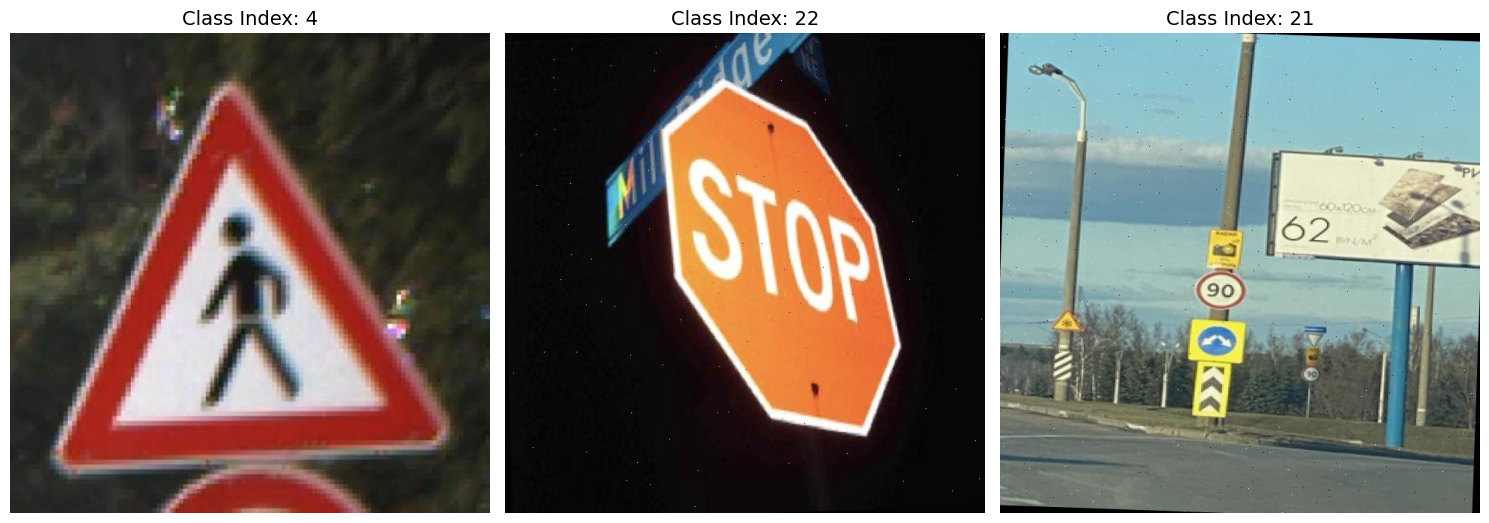

Random samples from Validation images with class index:


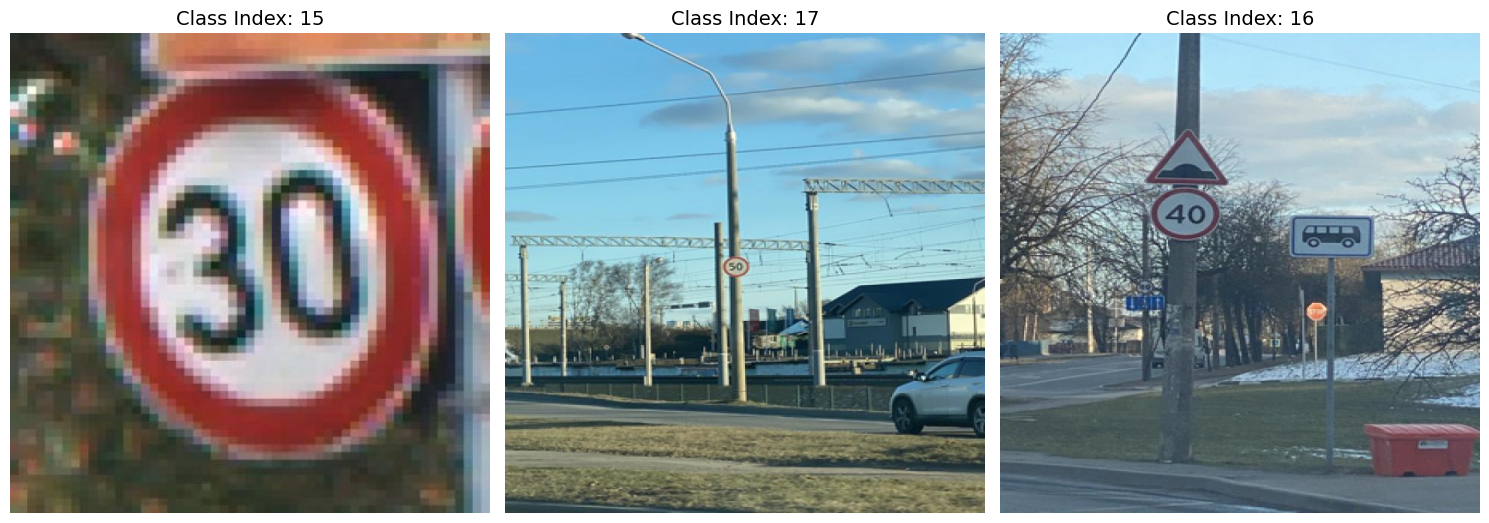

Random samples from Test images (no labels):


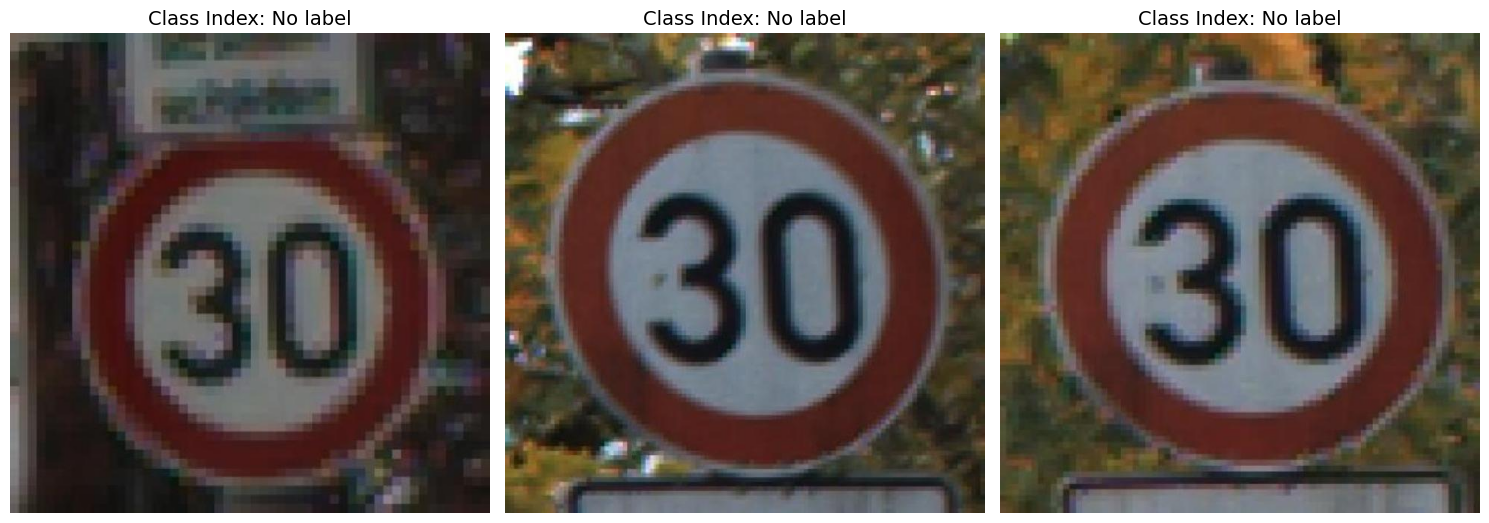

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Function to display random samples with only the class index
def display_random_samples_with_class_index(images_path, labels_path=None, num_samples=3):
    images = os.listdir(images_path)
    random_samples = random.sample(images, num_samples)

    plt.figure(figsize=(15, 10))
    for i, img_file in enumerate(random_samples, 1):
        img_path = os.path.join(images_path, img_file)
        img = mpimg.imread(img_path)

        # Get class index from label file if available
        if labels_path:
            label_file = img_file.replace('.jpg', '.txt').replace('.png', '.txt')
            label_path = os.path.join(labels_path, label_file)
            if os.path.exists(label_path):
                with open(label_path, 'r') as file:
                    # Read the label file and extract only the class index (the first number)
                    class_index = file.readline().split()[0]  # Extracts only the class index
            else:
                class_index = 'No label found'
        else:
            class_index = 'No label'

        plt.subplot(1, num_samples, i)
        plt.imshow(img)
        plt.title(f"Class Index: {class_index}", fontsize=14)  # Display only the class index
        plt.axis('off')  # Hide the axes for cleaner display
    plt.tight_layout()
    plt.show()

# Display random samples from train, validation, and test sets with only class index
print("Random samples from Train images with class index:")
display_random_samples_with_class_index(train_images_path, train_labels_path)

print("Random samples from Validation images with class index:")
display_random_samples_with_class_index(valid_images_path, valid_labels_path)

print("Random samples from Test images (no labels):")
display_random_samples_with_class_index(test_images_path)  # No labels for test set

In [ ]:
# Create a dictionary mapping each class ID to its corresponding label name
class_id_to_name = {i: name for i, name in enumerate(expected_class_names)}

# Display the mapping
print("Class ID to Label Name Mapping:")
for class_id, label_name in class_id_to_name.items():
    print(f"{class_id}: {label_name}")

Class ID to Label Name Mapping:
0: -Road narrows on right
1: Attention Please-
2: Beware of children
3: CYCLE ROUTE AHEAD WARNING
4: Crosswalk
5: Dangerous Left Curve Ahead
6: Dangerous Rright Curve Ahead
7: No Entry
8: No_Over_Taking
9: One way road
10: Speed bump ahead
11: Speed limit
12: Speed limit 100 Kph
13: Speed limit 120 Kph
14: Speed limit 20 Kph
15: Speed limit 30 Kph
16: Speed limit 40 Kph
17: Speed limit 50 Kph
18: Speed limit 60 Kph
19: Speed limit 70 Kph
20: Speed limit 80 Kph
21: Speed limit 90 Kph
22: Stop_Sign
23: Uneven Road
24: roundabout


#installs

In [4]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.6/877.6 kB 45.7 MB/s eta 0:00:00


#Training

## default parameters for yolov8n

In [ ]:
from ultralytics import YOLO

# Load the YOLOv8 model with pretrained weights
model = YOLO('yolov8n.pt')  # 'yolov8n.pt' is the nano version, you can change to 'yolov8s.pt', 'yolov8m.pt', etc.

# Train the model on your dataset using the default parameters
results = model.train(
    data='/content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/data.yaml',  # Path to your data.yaml file
    epochs=10,  # Number of training epochs
    batch=16,   # Default batch size
    imgsz=640,  # Image size
    name='yolov8_road_sign_default'  # Name for the experiment
)

# Display results
results

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 35.5MB/s]


Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8_road_sign_default, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt

100%|██████████| 755k/755k [00:00<00:00, 6.78MB/s]


Overriding model.yaml nc=80 with nc=25

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 32.2MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/train/labels.cache... 5325 images, 12 backgrounds, 0 corrupt: 100%|██████████| 5325/5325 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.20 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/valid/labels.cache... 623 images, 1 backgrounds, 0 corrupt: 100%|██████████| 623/623 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8_road_sign_default/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000345, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/yolov8_road_sign_default
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.31G     0.7871      3.661      1.251         13        640: 100%|██████████| 333/333 [03:17<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:04<00:00,  4.63it/s]


                   all        623        801      0.708      0.466      0.591      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.29G     0.6982      2.172      1.143         13        640: 100%|██████████| 333/333 [00:33<00:00,  9.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.31it/s]

                   all        623        801      0.799      0.697      0.769      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.29G     0.6829      1.634      1.133         16        640: 100%|██████████| 333/333 [00:32<00:00, 10.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.29it/s]

                   all        623        801      0.759      0.793      0.809      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.29G     0.6664      1.307      1.114         19        640: 100%|██████████| 333/333 [00:33<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.37it/s]


                   all        623        801      0.861      0.793      0.872      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.29G     0.6425      1.065       1.09         16        640: 100%|██████████| 333/333 [00:32<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.22it/s]

                   all        623        801       0.89      0.845      0.908      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.28G      0.613     0.8868      1.075         18        640: 100%|██████████| 333/333 [00:32<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.46it/s]


                   all        623        801       0.89      0.884      0.934      0.772

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.29G     0.5925     0.7735      1.054         16        640: 100%|██████████| 333/333 [00:32<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.30it/s]

                   all        623        801      0.914      0.865       0.93      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.29G      0.577     0.6993      1.044         14        640: 100%|██████████| 333/333 [00:32<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.12it/s]

                   all        623        801      0.933      0.877      0.946      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.29G     0.5597     0.6388      1.026         13        640: 100%|██████████| 333/333 [00:33<00:00, 10.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.36it/s]


                   all        623        801      0.935      0.898      0.954        0.8

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.28G     0.5366     0.5983      1.015         15        640: 100%|██████████| 333/333 [00:32<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.17it/s]

                   all        623        801       0.93       0.89      0.954      0.797



10 epochs completed in 0.149 hours.
Optimizer stripped from runs/detect/yolov8_road_sign_default/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/yolov8_road_sign_default/weights/best.pt, 6.3MB

Validating runs/detect/yolov8_road_sign_default/weights/best.pt...
Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3,010,523 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.52it/s]


                   all        623        801      0.934      0.899      0.954        0.8
-Road narrows on right         15         15      0.957      0.933      0.985      0.885
     Attention Please-         23         23      0.998          1      0.995      0.883
    Beware of children         23         23      0.977      0.826      0.912      0.807
CYCLE ROUTE AHEAD WARNING         29         29      0.956      0.931      0.976      0.876
             Crosswalk         42         43      0.917      0.953      0.962      0.722
Dangerous Left Curve Ahead         24         24      0.754      0.875      0.836      0.663
Dangerous Rright Curve Ahead         30         30      0.925      0.818      0.936      0.782
              No Entry         26         27       0.94      0.963      0.982      0.904
        No_Over_Taking         23         23      0.956      0.957      0.992      0.721
          One way road         27         27      0.882      0.852      0.889      0.767
      Sp

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a0ca4354760>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,  

In [ ]:
metrics = model.val()
# Inspecting the DetMetrics object
print(dir(metrics))  # This will show all available attributes and methods

Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3,010,523 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/valid/labels.cache... 623 images, 1 backgrounds, 0 corrupt: 100%|██████████| 623/623 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:07<00:00,  5.48it/s]


                   all        623        801      0.935      0.898      0.953        0.8
-Road narrows on right         15         15      0.956      0.933      0.985      0.892
     Attention Please-         23         23      0.998          1      0.995      0.883
    Beware of children         23         23      0.977      0.826      0.912      0.811
CYCLE ROUTE AHEAD WARNING         29         29      0.957      0.931      0.976      0.876
             Crosswalk         42         43      0.918      0.953      0.962      0.721
Dangerous Left Curve Ahead         24         24      0.755      0.875      0.835      0.666
Dangerous Rright Curve Ahead         30         30      0.925      0.817      0.935       0.78
              No Entry         26         27       0.94      0.963      0.982      0.907
        No_Over_Taking         23         23      0.964      0.957      0.992      0.721
          One way road         27         27      0.883      0.852      0.889      0.767
      Sp

In [ ]:
# IoU for each class at IoU threshold 50% (IoU@0.50)
class_ids = metrics.box.ap_class_index
iou_per_class = metrics.box.ap50

# Mapping class IDs to IoU values
class_iou_mapping = dict(zip(class_ids, iou_per_class))

# Output IoU per class
for class_id, iou in class_iou_mapping.items():
    print(f"Class ID: {class_id}, IoU@0.50: {iou}")


Class ID: 0, IoU@0.50: 0.9849999999999999
Class ID: 1, IoU@0.50: 0.995
Class ID: 2, IoU@0.50: 0.9115176893311224
Class ID: 3, IoU@0.50: 0.9755240641711231
Class ID: 4, IoU@0.50: 0.961892264451966
Class ID: 5, IoU@0.50: 0.8353873940363866
Class ID: 6, IoU@0.50: 0.9346299249654881
Class ID: 7, IoU@0.50: 0.9819444444444446
Class ID: 8, IoU@0.50: 0.9918
Class ID: 9, IoU@0.50: 0.8892122447125204
Class ID: 10, IoU@0.50: 0.995
Class ID: 11, IoU@0.50: 0.9234386604774536
Class ID: 12, IoU@0.50: 0.9825932835820894
Class ID: 13, IoU@0.50: 0.9891379310344828
Class ID: 14, IoU@0.50: 0.9264249845111548
Class ID: 15, IoU@0.50: 0.9285047825461644
Class ID: 16, IoU@0.50: 0.9806495090190496
Class ID: 17, IoU@0.50: 0.9582841466142588
Class ID: 18, IoU@0.50: 0.9347584317520443
Class ID: 19, IoU@0.50: 0.9232338056680164
Class ID: 20, IoU@0.50: 0.9732036619412049
Class ID: 21, IoU@0.50: 0.9325975394117658
Class ID: 22, IoU@0.50: 0.938196875
Class ID: 23, IoU@0.50: 0.9933333333333334
Class ID: 24, IoU@0.50: 

In [ ]:
predictions = model.predict(source='/content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/test', save=True)
# Inspect the structure of predictions
print(predictions)

Streaming output truncated to the last 5000 lines.
       [[ 65,  82, 103],
        [ 65,  82, 103],
        [ 65,  82, 103],
        ...,
        [ 75,  85,  95],
        [ 73,  85,  95],
        [ 73,  85,  95]],

       [[ 65,  82, 103],
        [ 65,  82, 103],
        [ 65,  82, 103],
        ...,
        [ 75,  85,  95],
        [ 73,  85,  95],
        [ 73,  85,  95]]], dtype=uint8)
orig_shape: (640, 640)
path: '/content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/test/00041_00000_00005_png_jpg.rf.1f281ba92a999eab4b18c99e6af40415.jpg'
probs: None
save_dir: 'runs/detect/yolov8_road_sign_default3'
speed: {'preprocess': 2.1562576293945312, 'inference': 8.458137512207031, 'postprocess': 1.6276836395263672}, ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: '-Road narrows on right', 1: 'Attention Please-', 2: 'Beware of children', 3: 'CYCLE ROUTE AHEAD WARNING', 4: 'Cros

In [ ]:
# Create a submission file
with open('submission.csv', 'w') as f:
    f.write('filename,class\n')  # CSV header

    # Loop through each result (prediction)
    for pred in predictions:
        image_id = pred.path.split('/')[-1]  # Extract image ID from the path

        if pred.boxes is not None and len(pred.boxes) > 0:  # Check if there are any predicted boxes
            best_box = None  # Placeholder for best box (highest confidence)
            best_confidence = -1  # Initialize with a low value

            # Loop through each prediction box to find the best (highest confidence) box
            for box in pred.boxes.data:
                confidence = box[4].item()  # Confidence score (usually stored in index 4)

                if confidence > best_confidence:
                    best_confidence = confidence
                    best_box = box

            # After identifying the best box, write its class to the submission file
            if best_box is not None:
                class_id = int(best_box[5].item())  # Class ID (usually stored in index 5)
                class_name = pred.names[class_id]  # Get class name from 'names' dictionary
                f.write(f"{image_id},{class_name}\n")

        else:
            # If no boxes were detected for this image, write a default 'No detection'
            f.write(f"{image_id},No detection\n")

In [ ]:
import shutil
from google.colab import files

# Zip the entire 'runs' folder
shutil.make_archive('runs_backup', 'zip', 'runs')

# Download the zipped file
files.download('runs_backup.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 0.86

In [ ]:
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO('yolov8n.pt')  # You can use the small version or modify accordingly

# Define hyperparameters to modify
hyperparameters = {
    'lr0': 0.001,            # Learning rate (try 0.001 - 0.0001)
    'batch': 32,             # Batch size (try larger values like 32 or 64)
    'epochs': 100,           # Number of epochs (increase if needed)
    'momentum': 0.937,       # Momentum (default is 0.937, adjust if necessary)
    'weight_decay': 0.0005,  # Weight decay to help prevent overfitting
    'imgsz': 640,            # Image size (larger sizes may improve detection, but require more memory)
    'optimizer': 'AdamW',    # You can try other optimizers like 'SGD' if desired
}

# Train the model with modified hyperparameters
results = model.train(
    data='/content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/data.yaml',   # Your dataset configuration file
    epochs=hyperparameters['epochs'],
    lr0=hyperparameters['lr0'],
    batch=hyperparameters['batch'],
    momentum=hyperparameters['momentum'],
    weight_decay=hyperparameters['weight_decay'],
    imgsz=hyperparameters['imgsz'],
    optimizer=hyperparameters['optimizer']
)

# Evaluate the model to check mAP improvements
metrics = model.val()
print("mAP@0.5: ", metrics['map50'])  # mAP at IoU threshold 0.5
print("mAP@0.5:0.95: ", metrics['map'])  # mAP across all IoU thresholds (0.5 to 0.95)

Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/data.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf

train: Scanning /content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/train/labels.cache... 5325 images, 12 backgrounds, 0 corrupt: 100%|██████████| 5325/5325 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/valid/labels.cache... 623 images, 1 backgrounds, 0 corrupt: 100%|██████████| 623/623 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.49G     0.8829      2.656      1.273         34        640: 100%|██████████| 167/167 [01:05<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.01it/s]

                   all        623        801      0.381      0.407      0.338      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.49G     0.8598      1.582      1.236         34        640: 100%|██████████| 167/167 [00:25<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.48it/s]

                   all        623        801        0.5      0.553      0.517      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100       4.5G     0.8314      1.308      1.215         41        640: 100%|██████████| 167/167 [00:28<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.66it/s]

                   all        623        801      0.441      0.515      0.507      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.49G     0.8145      1.194      1.207         31        640: 100%|██████████| 167/167 [00:25<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.52it/s]

                   all        623        801      0.648      0.627      0.678      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.48G      0.799      1.087       1.19         34        640: 100%|██████████| 167/167 [00:25<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.84it/s]


                   all        623        801      0.758      0.672      0.744      0.596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.47G     0.7825     0.9886      1.181         23        640: 100%|██████████| 167/167 [00:25<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.80it/s]


                   all        623        801      0.722      0.757      0.787      0.586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       4.5G     0.7584     0.9061      1.168         31        640: 100%|██████████| 167/167 [00:26<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.82it/s]

                   all        623        801      0.785      0.758       0.82      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.49G     0.7541     0.8944      1.158         30        640: 100%|██████████| 167/167 [00:25<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.78it/s]

                   all        623        801      0.878      0.799      0.898      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100       4.5G     0.7506     0.8554      1.161         41        640: 100%|██████████| 167/167 [00:26<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.66it/s]


                   all        623        801      0.848      0.811      0.881       0.71

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.47G     0.7353      0.816      1.143         27        640: 100%|██████████| 167/167 [00:25<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.68it/s]

                   all        623        801      0.841      0.794      0.856      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.47G     0.7339     0.7884      1.142         33        640: 100%|██████████| 167/167 [00:25<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.64it/s]

                   all        623        801       0.87      0.858      0.909      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.46G     0.7123     0.7653      1.138         31        640: 100%|██████████| 167/167 [00:25<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.62it/s]

                   all        623        801      0.873       0.86      0.926      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100       4.5G     0.7041     0.7238      1.123         39        640: 100%|██████████| 167/167 [00:25<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.49it/s]

                   all        623        801      0.868      0.865      0.926      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.47G     0.7099     0.7022      1.126         37        640: 100%|██████████| 167/167 [00:25<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.63it/s]

                   all        623        801      0.905      0.864      0.932      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.47G     0.6994      0.696      1.118         33        640: 100%|██████████| 167/167 [00:26<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.67it/s]


                   all        623        801       0.89      0.836      0.905      0.727

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.47G     0.6989     0.6745      1.118         39        640: 100%|██████████| 167/167 [00:25<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.82it/s]


                   all        623        801      0.887      0.888      0.935      0.753

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       4.5G     0.6924      0.664      1.116         32        640: 100%|██████████| 167/167 [00:25<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.87it/s]


                   all        623        801      0.906       0.87      0.942      0.761

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.47G     0.6831     0.6509      1.112         31        640: 100%|██████████| 167/167 [00:25<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.85it/s]


                   all        623        801      0.901      0.899      0.941      0.783

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.47G      0.682     0.6222      1.103         33        640: 100%|██████████| 167/167 [00:25<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.67it/s]

                   all        623        801      0.927      0.903      0.962      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.51G     0.6656     0.6184        1.1         28        640: 100%|██████████| 167/167 [00:25<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.62it/s]

                   all        623        801      0.888      0.885      0.945       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.48G     0.6698     0.6136      1.102         27        640: 100%|██████████| 167/167 [00:26<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.68it/s]


                   all        623        801      0.929      0.888      0.949      0.785

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       4.5G     0.6661     0.6016      1.097         41        640: 100%|██████████| 167/167 [00:25<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.58it/s]

                   all        623        801      0.915      0.905      0.943      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.47G      0.664     0.5897      1.095         37        640: 100%|██████████| 167/167 [00:25<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.70it/s]


                   all        623        801      0.932      0.898      0.945      0.779

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       4.5G     0.6668     0.5896      1.097         34        640: 100%|██████████| 167/167 [00:25<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.68it/s]

                   all        623        801      0.916      0.919      0.959      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       4.5G      0.655     0.5821       1.09         33        640: 100%|██████████| 167/167 [00:25<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.83it/s]


                   all        623        801      0.936      0.876      0.952       0.78

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.49G     0.6483     0.5751      1.087         34        640: 100%|██████████| 167/167 [00:25<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.64it/s]

                   all        623        801      0.934      0.897      0.952      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       4.5G     0.6408     0.5514       1.08         39        640: 100%|██████████| 167/167 [00:26<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.78it/s]


                   all        623        801       0.93      0.906      0.949      0.782

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.49G     0.6356     0.5382      1.082         38        640: 100%|██████████| 167/167 [00:25<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.76it/s]

                   all        623        801      0.939      0.913      0.958      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       4.5G     0.6312     0.5361      1.077         37        640: 100%|██████████| 167/167 [00:25<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.76it/s]


                   all        623        801      0.927      0.915      0.951      0.786

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.47G     0.6403     0.5446      1.087         36        640: 100%|██████████| 167/167 [00:25<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.64it/s]

                   all        623        801      0.926      0.923      0.955      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.51G     0.6344     0.5282      1.079         30        640: 100%|██████████| 167/167 [00:25<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.69it/s]


                   all        623        801      0.898      0.933      0.949      0.783

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.49G     0.6235     0.5247      1.072         32        640: 100%|██████████| 167/167 [00:25<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.55it/s]

                   all        623        801      0.922      0.918      0.963      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.48G     0.6223      0.516      1.073         30        640: 100%|██████████| 167/167 [00:26<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.66it/s]

                   all        623        801      0.931       0.92      0.962      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.46G     0.6192     0.5072      1.067         42        640: 100%|██████████| 167/167 [00:25<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.64it/s]

                   all        623        801      0.948       0.91      0.955      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.47G      0.616     0.5043      1.069         33        640: 100%|██████████| 167/167 [00:25<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.65it/s]

                   all        623        801      0.925      0.921      0.962      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.46G     0.6132     0.4999      1.062         37        640: 100%|██████████| 167/167 [00:25<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.77it/s]


                   all        623        801      0.934      0.927      0.956      0.792

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.48G     0.6113     0.5003      1.065         26        640: 100%|██████████| 167/167 [00:25<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.80it/s]


                   all        623        801      0.917      0.921      0.958      0.799

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       4.5G     0.6113     0.5024      1.065         21        640: 100%|██████████| 167/167 [00:25<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.69it/s]

                   all        623        801      0.921      0.923      0.955      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.51G     0.6031     0.4843      1.058         27        640: 100%|██████████| 167/167 [00:26<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.64it/s]


                   all        623        801       0.94      0.914      0.957      0.797

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100       4.5G     0.6024     0.4831      1.063         43        640: 100%|██████████| 167/167 [00:25<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.70it/s]

                   all        623        801       0.95      0.915      0.966      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.47G        0.6     0.4771      1.055         47        640: 100%|██████████| 167/167 [00:25<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.66it/s]

                   all        623        801      0.916      0.932      0.951      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.49G     0.6016     0.4665      1.057         29        640: 100%|██████████| 167/167 [00:25<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.68it/s]

                   all        623        801      0.934      0.939      0.962      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.51G     0.6001     0.4759      1.054         43        640: 100%|██████████| 167/167 [00:25<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.60it/s]

                   all        623        801      0.938      0.916      0.958        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.47G     0.5869     0.4653       1.05         41        640: 100%|██████████| 167/167 [00:25<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.53it/s]

                   all        623        801      0.939      0.915      0.963        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100       4.5G     0.5796     0.4586       1.05         34        640: 100%|██████████| 167/167 [00:26<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.73it/s]

                   all        623        801      0.954      0.935      0.967      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.47G     0.5796     0.4634      1.046         38        640: 100%|██████████| 167/167 [00:25<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.76it/s]

                   all        623        801      0.941      0.924      0.964      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       4.5G     0.5819     0.4557      1.047         48        640: 100%|██████████| 167/167 [00:25<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.83it/s]


                   all        623        801      0.926      0.932      0.961        0.8

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100       4.5G     0.5715     0.4384      1.039         30        640: 100%|██████████| 167/167 [00:25<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.95it/s]

                   all        623        801      0.941      0.932      0.964        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.48G     0.5776     0.4443      1.042         29        640: 100%|██████████| 167/167 [00:25<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.88it/s]


                   all        623        801      0.934      0.928      0.961      0.809

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.49G     0.5649     0.4307      1.041         29        640: 100%|██████████| 167/167 [00:25<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.52it/s]

                   all        623        801      0.937      0.926      0.963      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.47G     0.5677     0.4357      1.036         36        640: 100%|██████████| 167/167 [00:26<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.66it/s]

                   all        623        801      0.951      0.927      0.968      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.47G     0.5657     0.4382      1.035         34        640: 100%|██████████| 167/167 [00:25<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.62it/s]

                   all        623        801      0.944      0.932      0.962      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100       4.5G     0.5642     0.4255      1.036         33        640: 100%|██████████| 167/167 [00:25<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.62it/s]

                   all        623        801      0.935      0.927      0.957      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.47G     0.5627      0.425      1.035         35        640: 100%|██████████| 167/167 [00:25<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.77it/s]

                   all        623        801       0.94      0.929      0.953        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.48G     0.5594     0.4224      1.034         37        640: 100%|██████████| 167/167 [00:25<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.73it/s]


                   all        623        801      0.952      0.925      0.963      0.801

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.47G     0.5591     0.4132      1.032         33        640: 100%|██████████| 167/167 [00:25<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.62it/s]


                   all        623        801      0.938      0.919       0.96      0.801

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100       4.5G     0.5474     0.4121      1.024         43        640: 100%|██████████| 167/167 [00:26<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.75it/s]


                   all        623        801      0.955      0.923      0.957      0.803

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.49G     0.5519      0.407       1.03         21        640: 100%|██████████| 167/167 [00:25<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.82it/s]

                   all        623        801      0.955      0.919      0.968      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.51G     0.5517     0.4124      1.034         31        640: 100%|██████████| 167/167 [00:25<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.74it/s]

                   all        623        801      0.945      0.933      0.967      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.46G     0.5454     0.4064      1.027         45        640: 100%|██████████| 167/167 [00:25<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.85it/s]


                   all        623        801      0.942      0.932      0.964      0.817

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100       4.5G     0.5428     0.4047      1.027         29        640: 100%|██████████| 167/167 [00:25<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.64it/s]

                   all        623        801      0.944      0.914      0.958      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.47G     0.5444     0.4031      1.026         32        640: 100%|██████████| 167/167 [00:25<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.55it/s]

                   all        623        801      0.944      0.935      0.958      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.48G     0.5378     0.3957      1.025         29        640: 100%|██████████| 167/167 [00:26<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.69it/s]


                   all        623        801      0.939      0.926      0.964      0.817

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.46G     0.5302      0.387      1.019         32        640: 100%|██████████| 167/167 [00:25<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.55it/s]

                   all        623        801      0.942      0.921       0.96      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.47G     0.5285     0.3876      1.018         25        640: 100%|██████████| 167/167 [00:25<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.64it/s]

                   all        623        801      0.954      0.928      0.958      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.47G     0.5298     0.3874      1.019         36        640: 100%|██████████| 167/167 [00:25<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.68it/s]


                   all        623        801      0.946      0.936      0.963      0.809

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.51G      0.527      0.385      1.015         30        640: 100%|██████████| 167/167 [00:25<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.81it/s]


                   all        623        801      0.957      0.924      0.964      0.814

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.49G     0.5178     0.3783      1.012         24        640: 100%|██████████| 167/167 [00:25<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.73it/s]

                   all        623        801      0.961      0.919      0.964      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.47G     0.5204     0.3767       1.01         33        640: 100%|██████████| 167/167 [00:26<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.89it/s]

                   all        623        801      0.955      0.925      0.962      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.46G     0.5202       0.38      1.012         28        640: 100%|██████████| 167/167 [00:25<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.95it/s]


                   all        623        801      0.954      0.919      0.964      0.816

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.48G     0.5161     0.3727       1.01         32        640: 100%|██████████| 167/167 [00:25<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.69it/s]


                   all        623        801      0.946      0.923      0.965      0.814

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100       4.5G     0.5084      0.368      1.008         48        640: 100%|██████████| 167/167 [00:25<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.58it/s]

                   all        623        801      0.949      0.928      0.965      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.47G     0.5124     0.3723      1.009         30        640: 100%|██████████| 167/167 [00:25<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.75it/s]


                   all        623        801      0.931       0.93      0.958      0.804

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.47G     0.5096     0.3696      1.007         28        640: 100%|██████████| 167/167 [00:25<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.65it/s]


                   all        623        801      0.962      0.918      0.961      0.805

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.47G     0.5022     0.3608      1.001         33        640: 100%|██████████| 167/167 [00:26<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.71it/s]

                   all        623        801      0.957      0.925      0.961      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100       4.5G     0.5029     0.3616      1.002         36        640: 100%|██████████| 167/167 [00:25<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.56it/s]

                   all        623        801      0.955      0.927      0.958      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.48G     0.4931      0.356      1.004         27        640: 100%|██████████| 167/167 [00:25<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.69it/s]

                   all        623        801      0.946      0.934      0.959      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.47G     0.4962     0.3605      1.007         37        640: 100%|██████████| 167/167 [00:25<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.89it/s]


                   all        623        801      0.951      0.934      0.958      0.807

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.48G     0.4931     0.3516     0.9968         30        640: 100%|██████████| 167/167 [00:25<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.79it/s]


                   all        623        801      0.947       0.93      0.961      0.807

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100       4.5G     0.4905     0.3518      1.001         34        640: 100%|██████████| 167/167 [00:25<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.90it/s]


                   all        623        801      0.948      0.933      0.962      0.808

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100       4.5G     0.4853     0.3471     0.9975         37        640: 100%|██████████| 167/167 [00:26<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.73it/s]

                   all        623        801      0.954      0.925      0.961      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.49G     0.4902     0.3429     0.9984         30        640: 100%|██████████| 167/167 [00:25<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.72it/s]


                   all        623        801      0.944      0.932      0.961      0.807

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.47G     0.4854     0.3435     0.9932         37        640: 100%|██████████| 167/167 [00:25<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.63it/s]

                   all        623        801      0.956      0.928       0.96      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.47G     0.4839     0.3386     0.9963         35        640: 100%|██████████| 167/167 [00:25<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.63it/s]

                   all        623        801      0.958      0.924      0.962      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.47G      0.475      0.337     0.9906         35        640: 100%|██████████| 167/167 [00:25<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.67it/s]


                   all        623        801      0.958      0.932      0.966      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.47G     0.4832     0.3392     0.9947         31        640: 100%|██████████| 167/167 [00:25<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.65it/s]

                   all        623        801      0.958      0.931      0.964       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.47G     0.4708     0.3334     0.9928         35        640: 100%|██████████| 167/167 [00:26<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.69it/s]

                   all        623        801      0.956      0.928      0.961      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100       4.5G     0.4749     0.3334     0.9892         28        640: 100%|██████████| 167/167 [00:25<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.80it/s]


                   all        623        801       0.94      0.936      0.959      0.808

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.47G     0.4712     0.3297     0.9893         34        640: 100%|██████████| 167/167 [00:25<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.89it/s]


                   all        623        801      0.947      0.931       0.96      0.808

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.46G     0.4713     0.3273     0.9873         29        640: 100%|██████████| 167/167 [00:25<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.86it/s]


                   all        623        801      0.954      0.927       0.96      0.807
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.47G     0.4079     0.2367     0.9458         19        640: 100%|██████████| 167/167 [00:27<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.85it/s]


                   all        623        801      0.954      0.928       0.96      0.805

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.47G     0.3954      0.228     0.9384         19        640: 100%|██████████| 167/167 [00:24<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.66it/s]


                   all        623        801      0.951       0.93      0.964      0.808

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.47G     0.3898     0.2241     0.9329         17        640: 100%|██████████| 167/167 [00:25<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.62it/s]

                   all        623        801      0.953      0.928      0.967      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.46G      0.387     0.2197     0.9332         13        640: 100%|██████████| 167/167 [00:24<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.75it/s]

                   all        623        801      0.952      0.929      0.966      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.48G     0.3832     0.2164     0.9284         15        640: 100%|██████████| 167/167 [00:24<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.66it/s]


                   all        623        801      0.952      0.924      0.966      0.812

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.47G     0.3809     0.2151     0.9293         13        640: 100%|██████████| 167/167 [00:24<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.54it/s]

                   all        623        801      0.948      0.932      0.966      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.47G     0.3755     0.2145     0.9223         18        640: 100%|██████████| 167/167 [00:24<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.56it/s]

                   all        623        801      0.948      0.933      0.966      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.47G     0.3749     0.2148     0.9242         17        640: 100%|██████████| 167/167 [00:24<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.75it/s]


                   all        623        801      0.945      0.936      0.966       0.81

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.47G     0.3726     0.2116     0.9222         17        640: 100%|██████████| 167/167 [00:24<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.51it/s]

                   all        623        801      0.945      0.934      0.966      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.46G     0.3699     0.2096     0.9249         19        640: 100%|██████████| 167/167 [00:24<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.66it/s]

                   all        623        801      0.944      0.936      0.966      0.812



100 epochs completed in 0.820 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3,010,523 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.62it/s]


                   all        623        801      0.942      0.932      0.964      0.817
-Road narrows on right         15         15      0.899      0.933      0.975      0.862
     Attention Please-         23         23          1      0.992      0.995       0.91
    Beware of children         23         23      0.954      0.913      0.953      0.834
CYCLE ROUTE AHEAD WARNING         29         29          1      0.963      0.972      0.846
             Crosswalk         42         43      0.885      0.897      0.947      0.734
Dangerous Left Curve Ahead         24         24      0.758      0.833      0.839      0.715
Dangerous Rright Curve Ahead         30         30      0.969        0.8      0.934       0.79
              No Entry         26         27      0.975          1      0.995      0.906
        No_Over_Taking         23         23      0.976      0.957      0.993      0.772
          One way road         27         27      0.867      0.815      0.913        0.8
      Sp

val: Scanning /content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/valid/labels.cache... 623 images, 1 backgrounds, 0 corrupt: 100%|██████████| 623/623 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:07<00:00,  2.70it/s]


                   all        623        801      0.942      0.932      0.964      0.817
-Road narrows on right         15         15      0.899      0.933      0.975      0.862
     Attention Please-         23         23          1      0.992      0.995      0.911
    Beware of children         23         23      0.954      0.913      0.953      0.824
CYCLE ROUTE AHEAD WARNING         29         29          1      0.963      0.972      0.849
             Crosswalk         42         43      0.885      0.897      0.947      0.732
Dangerous Left Curve Ahead         24         24      0.757      0.833      0.835      0.717
Dangerous Rright Curve Ahead         30         30      0.969        0.8      0.934      0.792
              No Entry         26         27      0.975          1      0.995      0.906
        No_Over_Taking         23         23      0.976      0.957      0.993      0.772
          One way road         27         27      0.867      0.815      0.913        0.8
      Sp

TypeError: 'DetMetrics' object is not subscriptable

In [ ]:
metrics = model.val()

Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)


val: Scanning /content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/valid/labels.cache... 623 images, 1 backgrounds, 0 corrupt: 100%|██████████| 623/623 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  2.87it/s]


                   all        623        801      0.942      0.932      0.964      0.817
-Road narrows on right         15         15      0.899      0.933      0.975      0.862
     Attention Please-         23         23          1      0.992      0.995      0.911
    Beware of children         23         23      0.954      0.913      0.953      0.824
CYCLE ROUTE AHEAD WARNING         29         29          1      0.963      0.972      0.849
             Crosswalk         42         43      0.885      0.897      0.947      0.732
Dangerous Left Curve Ahead         24         24      0.757      0.833      0.835      0.717
Dangerous Rright Curve Ahead         30         30      0.969        0.8      0.934      0.792
              No Entry         26         27      0.975          1      0.995      0.906
        No_Over_Taking         23         23      0.976      0.957      0.993      0.772
          One way road         27         27      0.867      0.815      0.913        0.8
      Sp

In [ ]:
# IoU for each class at IoU threshold 50% (IoU@0.50)
class_ids = metrics.box.ap_class_index
iou_per_class = metrics.box.ap50

# Mapping class IDs to IoU values
class_iou_mapping2 = dict(zip(class_ids, iou_per_class))

# Output IoU per class
for class_id, iou in class_iou_mapping2.items():
    print(f"Class ID: {class_id}, IoU@0.50: {iou}")

Class ID: 0, IoU@0.50: 0.9753333333333335
Class ID: 1, IoU@0.50: 0.995
Class ID: 2, IoU@0.50: 0.9531752380952382
Class ID: 3, IoU@0.50: 0.9719599999999999
Class ID: 4, IoU@0.50: 0.9467517936679006
Class ID: 5, IoU@0.50: 0.8351962850442726
Class ID: 6, IoU@0.50: 0.9339362285065719
Class ID: 7, IoU@0.50: 0.995
Class ID: 8, IoU@0.50: 0.9933333333333334
Class ID: 9, IoU@0.50: 0.9130325169359043
Class ID: 10, IoU@0.50: 0.9844117647058821
Class ID: 11, IoU@0.50: 0.908171717171717
Class ID: 12, IoU@0.50: 0.995
Class ID: 13, IoU@0.50: 0.995
Class ID: 14, IoU@0.50: 0.9503792996228607
Class ID: 15, IoU@0.50: 0.9746937283827374
Class ID: 16, IoU@0.50: 0.9669355756328515
Class ID: 17, IoU@0.50: 0.9482139380789061
Class ID: 18, IoU@0.50: 0.964525
Class ID: 19, IoU@0.50: 0.995
Class ID: 20, IoU@0.50: 0.9915366876310272
Class ID: 21, IoU@0.50: 0.9819168734491315
Class ID: 22, IoU@0.50: 0.9459607142857144
Class ID: 23, IoU@0.50: 0.995
Class ID: 24, IoU@0.50: 0.995


In [ ]:
predictions = model.predict(source='/content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/test', save=True)


image 1/308 /content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/test/00000_00000_00000_png_jpg.rf.fe38518f555b8b4d139ed0a31adee9fc.jpg: 640x640 1 No_Over_Taking, 8.2ms
image 2/308 /content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/test/00000_00000_00014_png_jpg.rf.da4d304ccb4fd7555f5c291bed572107.jpg: 640x640 1 Speed limit 20 Kph, 6.7ms
image 3/308 /content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/test/00000_00000_00018_png_jpg.rf.4eff8cf87317fad6622f1d00b81d575e.jpg: 640x640 1 Speed limit 20 Kph, 7.1ms
image 4/308 /content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/test/00000_00000_00019_png_jpg.rf.923c0a404dce9e2518dcff1a64cd7e04.jpg: 640x640 1 Speed limit 20 Kph, 9.5ms
image 5/308 /content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/test/00000_00000_00021_png_jpg.rf.f0f74c580fb71be6df258535e2d301af.jpg: 640x640 1 Dangerous Left Curve Ahead, 1 Speed limit 20 Kph, 8.0ms
image 6/308 /conte

In [ ]:
# Create a submission file
with open('submission.csv', 'w') as f:
    f.write('filename,class\n')  # CSV header

    # Loop through each result (prediction)
    for pred in predictions:
        image_id = pred.path.split('/')[-1]  # Extract image ID from the path

        if pred.boxes is not None and len(pred.boxes) > 0:  # Check if there are any predicted boxes
            best_box = None  # Placeholder for best box (highest confidence)
            best_confidence = -1  # Initialize with a low value

            # Loop through each prediction box to find the best (highest confidence) box
            for box in pred.boxes.data:
                confidence = box[4].item()  # Confidence score (usually stored in index 4)

                if confidence > best_confidence:
                    best_confidence = confidence
                    best_box = box

            # After identifying the best box, write its class to the submission file
            if best_box is not None:
                class_id = int(best_box[5].item())  # Class ID (usually stored in index 5)
                class_name = pred.names[class_id]  # Get class name from 'names' dictionary
                f.write(f"{image_id},{class_name}\n")

        else:
            # If no boxes were detected for this image, write a default 'No detection'
            f.write(f"{image_id},No detection\n")

In [20]:
import shutil
from google.colab import files

# Zip the entire 'runs' folder
shutil.make_archive('runs_backup_8n', 'zip', 'runs')

# Download the zipped file
files.download('runs_backup_8n.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 0.89

In [5]:
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO('yolov8n.pt')  # You can use the small version or modify accordingly

# Updated hyperparameters
hyperparameters = {
    'lr0': 0.0005,            # Lower learning rate for more fine-tuning
    'batch': 64,              # Increased batch size
    'epochs': 150,            # More epochs
    'momentum': 0.937,        # Keep momentum unchanged
    'weight_decay': 0.0005,   # Keep weight decay to prevent overfitting
    'imgsz': 704,             # Larger image size for better detail capture
    'optimizer': 'AdamW',     # Use AdamW optimizer
    'augment': True,          # Enable augmentations
    'cos_lr': True,           # Use cosine learning rate scheduler
    'patience': 10,           # Early stopping after 10 epochs without improvement
}

# Train the model with the modified hyperparameters
results = model.train(
    data='/content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/data.yaml',  # Dataset config
    epochs=hyperparameters['epochs'],
    lr0=hyperparameters['lr0'],
    batch=hyperparameters['batch'],
    momentum=hyperparameters['momentum'],
    weight_decay=hyperparameters['weight_decay'],
    imgsz=hyperparameters['imgsz'],
    optimizer=hyperparameters['optimizer'],
    augment=hyperparameters['augment'],
    cos_lr=hyperparameters['cos_lr'],
    patience=hyperparameters['patience'],  # Early stopping after no improvement
    verbose=True
)

# Track training and validation loss
train_loss = results['loss']  # Training loss
val_loss = results['val_loss']  # Validation loss
print(f"Training Loss: {train_loss}")
print(f"Validation Loss: {val_loss}")

# Create a submission file with best predictions
predictions = model.predict(source='/content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/test')  # Run predictions

# Create submission file ensuring no duplicates
with open('submission.csv', 'w') as f:
    f.write('filename,class\n')  # CSV header

    for pred in predictions:
        image_id = pred.path.split('/')[-1]  # Extract image ID from the path

        if pred.boxes is not None and len(pred.boxes) > 0:  # Check if there are any predicted boxes
            best_box = None  # Placeholder for best box (highest confidence)
            best_confidence = -1  # Initialize with a low value

            # Loop through each prediction box to find the best (highest confidence) box
            for box in pred.boxes.data:
                confidence = box[4].item()  # Confidence score (usually stored in index 4)

                if confidence > best_confidence:
                    best_confidence = confidence
                    best_box = box

            # After identifying the best box, write its class to the submission file
            if best_box is not None:
                class_id = int(best_box[5].item())  # Class ID (usually stored in index 5)
                class_name = pred.names[class_id]  # Get class name from 'names' dictionary
                f.write(f"{image_id},{class_name}\n")

        else:
            # If no boxes were detected for this image, write a default 'No detection'
            f.write(f"{image_id},No detection\n")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 38.0MB/s]


Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/data.yaml, epochs=150, time=None, patience=10, batch=64, imgsz=704, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fa

100%|██████████| 755k/755k [00:00<00:00, 104MB/s]


Overriding model.yaml nc=80 with nc=25

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 331MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/train/labels.cache... 5325 images, 12 backgrounds, 0 corrupt: 100%|██████████| 5325/5325 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.20 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/valid/labels.cache... 623 images, 1 backgrounds, 0 corrupt: 100%|██████████| 623/623 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.0005, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 704 train, 704 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      10.8G     0.8839      3.139      1.336         29        704: 100%|██████████| 84/84 [10:24<00:00,  7.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]

                   all        623        801      0.329      0.228      0.179      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      10.8G     0.8254      1.754      1.263         37        704: 100%|██████████| 84/84 [00:25<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]

                   all        623        801      0.359      0.512      0.458      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      10.4G     0.8036      1.317      1.237         37        704: 100%|██████████| 84/84 [00:27<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.85it/s]

                   all        623        801      0.548      0.503      0.605       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      10.4G     0.7902      1.134      1.223         47        704: 100%|██████████| 84/84 [00:27<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.88it/s]

                   all        623        801      0.759      0.635      0.731      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      10.4G      0.768      1.025      1.205         36        704: 100%|██████████| 84/84 [00:26<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.85it/s]

                   all        623        801      0.799      0.716      0.824      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      10.4G     0.7583     0.9227       1.19         32        704: 100%|██████████| 84/84 [00:27<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.88it/s]

                   all        623        801      0.787      0.757      0.852      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      10.4G     0.7268     0.8382      1.175         33        704: 100%|██████████| 84/84 [00:26<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.94it/s]

                   all        623        801      0.807      0.821      0.873      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      10.4G     0.7355     0.8339      1.171         33        704: 100%|██████████| 84/84 [00:27<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]

                   all        623        801       0.84       0.79      0.876      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      10.4G     0.7241     0.8028      1.169         27        704: 100%|██████████| 84/84 [00:26<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.85it/s]

                   all        623        801      0.826      0.724       0.83      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      10.4G     0.7173     0.7569      1.155         27        704: 100%|██████████| 84/84 [00:27<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]

                   all        623        801      0.859      0.845      0.902      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      10.4G     0.7103     0.7266      1.156         26        704: 100%|██████████| 84/84 [00:26<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]

                   all        623        801       0.89       0.81      0.899      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      10.4G     0.6962     0.7032       1.15         37        704: 100%|██████████| 84/84 [00:27<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.91it/s]

                   all        623        801      0.839       0.84      0.913      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      10.4G     0.6895     0.6785      1.143         35        704: 100%|██████████| 84/84 [00:26<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.91it/s]

                   all        623        801      0.913      0.867      0.944      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      10.4G     0.6888     0.6608      1.133         36        704: 100%|██████████| 84/84 [00:27<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.85it/s]

                   all        623        801        0.9      0.848      0.922      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      10.4G     0.6829     0.6491      1.134         43        704: 100%|██████████| 84/84 [00:26<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.87it/s]

                   all        623        801       0.89      0.885      0.931      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      10.4G     0.6734     0.6273      1.129         35        704: 100%|██████████| 84/84 [00:26<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.89it/s]

                   all        623        801      0.918      0.876      0.933      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      10.4G     0.6746     0.6229      1.126         39        704: 100%|██████████| 84/84 [00:27<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.82it/s]

                   all        623        801      0.903      0.879      0.937       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      10.4G     0.6605     0.5984      1.114         33        704: 100%|██████████| 84/84 [00:26<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.90it/s]

                   all        623        801      0.903      0.888      0.944      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      10.4G     0.6662     0.5977      1.116         39        704: 100%|██████████| 84/84 [00:27<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.90it/s]

                   all        623        801      0.894      0.875      0.928      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      10.4G     0.6562     0.5891      1.115         31        704: 100%|██████████| 84/84 [00:27<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]

                   all        623        801      0.875      0.897      0.938      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      10.5G     0.6551     0.5783       1.11         26        704: 100%|██████████| 84/84 [00:26<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.87it/s]

                   all        623        801      0.894       0.87      0.928      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      10.4G     0.6381     0.5627      1.109         43        704: 100%|██████████| 84/84 [00:27<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.88it/s]

                   all        623        801      0.909      0.925       0.95      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      10.4G     0.6435      0.564      1.107         41        704: 100%|██████████| 84/84 [00:27<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]

                   all        623        801      0.879      0.897      0.945      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      10.4G     0.6377     0.5593      1.107         29        704: 100%|██████████| 84/84 [00:26<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.85it/s]

                   all        623        801      0.943      0.876      0.956      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      10.4G     0.6342     0.5479      1.105         35        704: 100%|██████████| 84/84 [00:27<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.90it/s]

                   all        623        801      0.928      0.894      0.953      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      10.4G     0.6298     0.5382      1.097         29        704: 100%|██████████| 84/84 [00:26<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.88it/s]

                   all        623        801      0.923      0.899      0.952      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      10.4G     0.6291     0.5264      1.094         37        704: 100%|██████████| 84/84 [00:26<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.86it/s]

                   all        623        801      0.914      0.918      0.951       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      10.4G     0.6182     0.5211      1.089         33        704: 100%|██████████| 84/84 [00:26<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.88it/s]

                   all        623        801      0.908      0.902      0.948      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      10.4G     0.6149     0.5141       1.09         28        704: 100%|██████████| 84/84 [00:27<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.86it/s]

                   all        623        801      0.923      0.916      0.954      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      10.4G     0.6251     0.5209      1.098         38        704: 100%|██████████| 84/84 [00:26<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.82it/s]

                   all        623        801      0.918      0.909      0.951      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      10.4G      0.616     0.5065       1.09         33        704: 100%|██████████| 84/84 [00:26<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.86it/s]

                   all        623        801       0.92      0.909      0.954      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      10.4G     0.6098        0.5      1.089         31        704: 100%|██████████| 84/84 [00:27<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.93it/s]

                   all        623        801      0.916      0.924      0.954      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      10.4G      0.605     0.4959      1.083         32        704: 100%|██████████| 84/84 [00:26<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.84it/s]

                   all        623        801      0.924      0.912       0.95       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      10.4G     0.6067     0.4939      1.082         31        704: 100%|██████████| 84/84 [00:26<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.89it/s]

                   all        623        801      0.947      0.896      0.948      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      10.4G     0.6037     0.4761      1.079         41        704: 100%|██████████| 84/84 [00:27<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.92it/s]

                   all        623        801      0.939      0.914      0.958      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      10.4G     0.5912     0.4793      1.076         35        704: 100%|██████████| 84/84 [00:26<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]

                   all        623        801      0.928      0.907      0.952      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      10.4G     0.5917      0.473       1.07         32        704: 100%|██████████| 84/84 [00:26<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.87it/s]

                   all        623        801      0.943      0.914      0.958      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      10.4G     0.5885      0.466      1.075         24        704: 100%|██████████| 84/84 [00:27<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]

                   all        623        801      0.931      0.926      0.963      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      10.4G     0.5965     0.4674      1.076         29        704: 100%|██████████| 84/84 [00:26<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.88it/s]

                   all        623        801      0.916      0.909      0.951      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      10.4G     0.5783      0.462      1.073         27        704: 100%|██████████| 84/84 [00:26<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.82it/s]

                   all        623        801      0.942      0.892      0.955      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      10.4G     0.5772     0.4526      1.066         36        704: 100%|██████████| 84/84 [00:26<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.89it/s]

                   all        623        801      0.942      0.898      0.958      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      10.4G     0.5765     0.4447      1.065         38        704: 100%|██████████| 84/84 [00:27<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.88it/s]

                   all        623        801       0.95       0.91      0.951      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      10.4G     0.5755     0.4481      1.064         30        704: 100%|██████████| 84/84 [00:26<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.89it/s]

                   all        623        801      0.947      0.902      0.956      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      10.4G     0.5718     0.4507      1.064         36        704: 100%|██████████| 84/84 [00:26<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.89it/s]

                   all        623        801      0.935      0.914      0.959      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      10.4G     0.5645     0.4305      1.061         29        704: 100%|██████████| 84/84 [00:27<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.88it/s]

                   all        623        801      0.967      0.895       0.96      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      10.4G     0.5719     0.4462      1.066         29        704: 100%|██████████| 84/84 [00:26<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.86it/s]

                   all        623        801      0.948      0.916      0.962      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      10.4G     0.5635     0.4291      1.055         37        704: 100%|██████████| 84/84 [00:26<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]

                   all        623        801      0.931       0.91      0.954      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      10.4G     0.5616     0.4314      1.056         29        704: 100%|██████████| 84/84 [00:26<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.92it/s]

                   all        623        801      0.944      0.899      0.961      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      10.4G     0.5568     0.4232      1.053         36        704: 100%|██████████| 84/84 [00:26<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]

                   all        623        801      0.944      0.913      0.965       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      10.4G     0.5522      0.414      1.053         28        704: 100%|██████████| 84/84 [00:27<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.88it/s]

                   all        623        801      0.939      0.898      0.953      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      10.4G     0.5565      0.412      1.052         35        704: 100%|██████████| 84/84 [00:26<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.91it/s]

                   all        623        801      0.922      0.933      0.963      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      10.4G     0.5542     0.4264      1.047         31        704: 100%|██████████| 84/84 [00:26<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.82it/s]

                   all        623        801      0.926      0.925      0.962      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      10.4G     0.5517     0.4137      1.049         30        704: 100%|██████████| 84/84 [00:27<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.87it/s]

                   all        623        801      0.948      0.914      0.964        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      10.4G     0.5404     0.4093      1.039         40        704: 100%|██████████| 84/84 [00:26<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.87it/s]

                   all        623        801      0.961        0.9      0.956       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      10.4G     0.5385     0.4046      1.042         33        704: 100%|██████████| 84/84 [00:27<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]

                   all        623        801      0.941      0.909      0.952      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      10.4G     0.5387     0.3994      1.042         26        704: 100%|██████████| 84/84 [00:26<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.86it/s]

                   all        623        801       0.95      0.909      0.955      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      10.4G     0.5371     0.3989      1.038         38        704: 100%|██████████| 84/84 [00:27<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.90it/s]

                   all        623        801      0.944      0.918      0.958      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      10.4G     0.5296     0.3994      1.037         36        704: 100%|██████████| 84/84 [00:26<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]

                   all        623        801      0.927      0.931      0.959      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      10.4G     0.5355     0.3996      1.042         32        704: 100%|██████████| 84/84 [00:26<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.87it/s]

                   all        623        801      0.942      0.935      0.962      0.802
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 49, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



59 epochs completed in 0.665 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3,010,523 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.01it/s]


                   all        623        801      0.931      0.935      0.963      0.804
-Road narrows on right         15         15      0.937          1      0.991        0.9
     Attention Please-         23         23      0.986          1      0.995      0.886
    Beware of children         23         23          1      0.764       0.98      0.851
CYCLE ROUTE AHEAD WARNING         29         29      0.946      0.931      0.966      0.869
             Crosswalk         42         43      0.888      0.953      0.953      0.734
Dangerous Left Curve Ahead         24         24      0.785      0.917      0.906      0.775
Dangerous Rright Curve Ahead         30         30      0.922      0.833      0.932      0.769
              No Entry         26         27       0.93      0.987       0.99      0.891
        No_Over_Taking         23         23       0.99          1      0.995      0.746
          One way road         27         27      0.882      0.852      0.883      0.773
      Sp

TypeError: 'DetMetrics' object is not subscriptable

In [6]:
metrics = model.val()

Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3,010,523 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/valid/labels.cache... 623 images, 1 backgrounds, 0 corrupt: 100%|██████████| 623/623 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:09<00:00,  1.01it/s]


                   all        623        801      0.931      0.935      0.963      0.804
-Road narrows on right         15         15      0.937          1      0.991      0.898
     Attention Please-         23         23      0.986          1      0.995      0.886
    Beware of children         23         23          1      0.765       0.98      0.851
CYCLE ROUTE AHEAD WARNING         29         29      0.944      0.931      0.966      0.869
             Crosswalk         42         43      0.888      0.953      0.953       0.73
Dangerous Left Curve Ahead         24         24      0.785      0.917      0.906      0.776
Dangerous Rright Curve Ahead         30         30      0.921      0.833      0.933      0.764
              No Entry         26         27       0.93      0.988       0.99      0.891
        No_Over_Taking         23         23       0.99          1      0.995      0.746
          One way road         27         27      0.882      0.852      0.883      0.776
      Sp

In [7]:
from PIL import Image

# Replace with the path to one of your images in the dataset (test, train, or validation set)
image_path = '/content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/train/images/-2021-07-12_Road_sign-_A143_road-_Ellingham-_Norfolk_jpg.rf.0db47f287353ebfbc4feff6834e239bd.jpg'

# Open image and print dimensions
img = Image.open(image_path)
print(f"Image dimensions (width x height): {img.size}")

Image dimensions (width x height): (640, 640)


In [8]:
# Create a submission file with best predictions
predictions = model.predict(source='/content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/test')  # Run predictions

# Create submission file ensuring no duplicates
with open('submission_1.csv', 'w') as f:
    f.write('filename,class\n')  # CSV header

    for pred in predictions:
        image_id = pred.path.split('/')[-1]  # Extract image ID from the path

        if pred.boxes is not None and len(pred.boxes) > 0:  # Check if there are any predicted boxes
            best_box = None  # Placeholder for best box (highest confidence)
            best_confidence = -1  # Initialize with a low value

            # Loop through each prediction box to find the best (highest confidence) box
            for box in pred.boxes.data:
                confidence = box[4].item()  # Confidence score (usually stored in index 4)

                if confidence > best_confidence:
                    best_confidence = confidence
                    best_box = box

            # After identifying the best box, write its class to the submission file
            if best_box is not None:
                class_id = int(best_box[5].item())  # Class ID (usually stored in index 5)
                class_name = pred.names[class_id]  # Get class name from 'names' dictionary
                f.write(f"{image_id},{class_name}\n")

        else:
            # If no boxes were detected for this image, write a default 'No detection'
            f.write(f"{image_id},No detection\n")


image 1/308 /content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/test/00000_00000_00000_png_jpg.rf.fe38518f555b8b4d139ed0a31adee9fc.jpg: 704x704 1 No_Over_Taking, 1 Speed limit 20 Kph, 99.5ms
image 2/308 /content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/test/00000_00000_00014_png_jpg.rf.da4d304ccb4fd7555f5c291bed572107.jpg: 704x704 1 Dangerous Left Curve Ahead, 1 Speed limit 20 Kph, 26.3ms
image 3/308 /content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/test/00000_00000_00018_png_jpg.rf.4eff8cf87317fad6622f1d00b81d575e.jpg: 704x704 1 Beware of children, 1 Speed limit 20 Kph, 26.2ms
image 4/308 /content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/test/00000_00000_00019_png_jpg.rf.923c0a404dce9e2518dcff1a64cd7e04.jpg: 704x704 1 Speed limit 20 Kph, 27.0ms
image 5/308 /content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/test/00000_00000_00021_png_jpg.rf.f0f74c580fb71be6df258535e2d301af.jpg: 704x70

In [12]:
import os
from ultralytics import YOLO
from pathlib import Path
import glob

# Load your trained model
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Specify the source of the validation images and labels
source_path = '/content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/test'
ground_truth_path = '/content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/valid/labels'

# Specify the directory where you want to save the predictions
save_directory = '/content/runs/detect/predictions_labels_test'  # Folder for saving labels
os.makedirs(save_directory, exist_ok=True)  # Create the directory if it doesn't exist

# Predict and get the results
predictions = model.predict(source=source_path, save=True)

# Function to calculate IoU
def calculate_iou(box1, box2):
    """Calculates IoU for two bounding boxes in (x1, y1, x2, y2) format."""
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    # Compute the area of intersection
    inter_area = max(0, x2 - x1) * max(0, y2 - y1)

    # Compute the area of both the prediction and ground-truth rectangles
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    # Compute the union area
    union_area = box1_area + box2_area - inter_area

    # Compute IoU
    iou = inter_area / union_area if union_area > 0 else 0
    return iou

def convert_yolo_to_xyxy(bbox, img_width, img_height):
    """Converts YOLO format (x_center, y_center, width, height) to (x1, y1, x2, y2)."""
    x_center, y_center, width, height = bbox
    x1 = (x_center - width / 2) * img_width
    y1 = (y_center - height / 2) * img_height
    x2 = (x_center + width / 2) * img_width
    y2 = (y_center + height / 2) * img_height
    return [x1, y1, x2, y2]

def load_ground_truth(ground_truth_path, image_name_base, img_width, img_height):
    """Loads ground truth bounding boxes from YOLO format and converts them to (x1, y1, x2, y2)."""
    gt_boxes = []

    # Match ground truth file using only the base part of the image name
    gt_pattern = os.path.join(ground_truth_path, f"{image_name_base}*.txt")
    matching_files = glob.glob(gt_pattern)

    if len(matching_files) == 0:
        print(f"No ground truth file found for {image_name_base}")
        return gt_boxes  # Return empty if no matching file is found

    gt_file = matching_files[0]  # Take the first match

    # Load ground truth boxes from the file
    with open(gt_file, 'r') as f:
        for line in f.readlines():
            label_data = line.split()
            bbox = [float(x) for x in label_data[1:5]]  # Assuming format: class x_center y_center width height
            gt_boxes.append(convert_yolo_to_xyxy(bbox, img_width, img_height))  # Convert to x1, y1, x2, y2

    return gt_boxes

# List to store IoU values
iou_list = []

# Save predictions and calculate IoU
for i, pred in enumerate(predictions):
    image_name = os.path.basename(pred.path)  # Get the image name
    label_file = os.path.join(save_directory, f"{image_name.split('.')[0]}.txt")  # Label file path

    pred_boxes = []  # To store predicted boxes for IoU calculation

    with open(label_file, 'w') as f:
        # Loop through each prediction box and save the label in YOLO format
        if pred.boxes is not None and len(pred.boxes) > 0:
            for box in pred.boxes.data:
                class_id = int(box[5].item())  # Class ID (usually stored in index 5)
                x_center = (box[0] + box[2]) / 2  # x_center (YOLO format)
                y_center = (box[1] + box[3]) / 2  # y_center (YOLO format)
                width = box[2] - box[0]  # width (YOLO format)
                height = box[3] - box[1]  # height (YOLO format)
                confidence = box[4].item()  # Confidence score

                # Store the predicted box in (x1, y1, x2, y2) format for IoU calculation
                pred_boxes.append([box[0].item(), box[1].item(), box[2].item(), box[3].item()])

                # Write the YOLO format label to the file (class_id x_center y_center width height confidence)
                f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f} {confidence:.6f}\n")
        else:
            f.write(f"No detections for {image_name}\n")


    image_name_base = image_name.split('.')[0]  # Extract base part of the image name
    gt_boxes = load_ground_truth(ground_truth_path, image_name_base, 640, 640)  # Pass all required arguments

    # Calculate IoU for each predicted box against the ground truth boxes
    if pred_boxes and gt_boxes:
        for pred_box in pred_boxes:
            best_iou = 0  # To store the best IoU for each predicted box
            for gt_box in gt_boxes:
                iou = calculate_iou(pred_box, gt_box)  # Compare only the box coordinates (x1, y1, x2, y2)
                if iou > best_iou:
                    best_iou = iou  # Store the best IoU for this predicted box
            print(f"IoU for {image_name}: {best_iou:.4f}")
            iou_list.append(best_iou)  # Append IoU to the list
    else:
        print(f"No predictions or ground truths available for {image_name}")

# Calculate and print the average IoU
if iou_list:
    avg_iou = sum(iou_list) / len(iou_list)
    print(f"Average IoU: {avg_iou:.4f}")
else:
    print("No IoU values calculated.")

print(f"Labels saved in {save_directory}")


image 1/308 /content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/test/00000_00000_00000_png_jpg.rf.fe38518f555b8b4d139ed0a31adee9fc.jpg: 704x704 1 No_Over_Taking, 1 Speed limit 20 Kph, 8.1ms
image 2/308 /content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/test/00000_00000_00014_png_jpg.rf.da4d304ccb4fd7555f5c291bed572107.jpg: 704x704 1 Beware of children, 2 Speed limit 20 Kphs, 7.4ms
image 3/308 /content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/test/00000_00000_00018_png_jpg.rf.4eff8cf87317fad6622f1d00b81d575e.jpg: 704x704 1 Beware of children, 1 Speed limit 20 Kph, 7.7ms
image 4/308 /content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/test/00000_00000_00019_png_jpg.rf.923c0a404dce9e2518dcff1a64cd7e04.jpg: 704x704 1 Speed limit 20 Kph, 9.8ms
image 5/308 /content/drive/Shareddrives/Lab1_KaggleDatasets/Road_Sign_Detection  3/test/00000_00000_00021_png_jpg.rf.f0f74c580fb71be6df258535e2d301af.jpg: 704x704 1 Speed l

In [ ]:
import shutil
from google.colab import files

# Zip the entire 'runs' folder
shutil.make_archive('runs_backup_8n_iou', 'zip', 'runs')

# Download the zipped file
files.download('runs_backup_8n_iou.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random samples from inferred images:


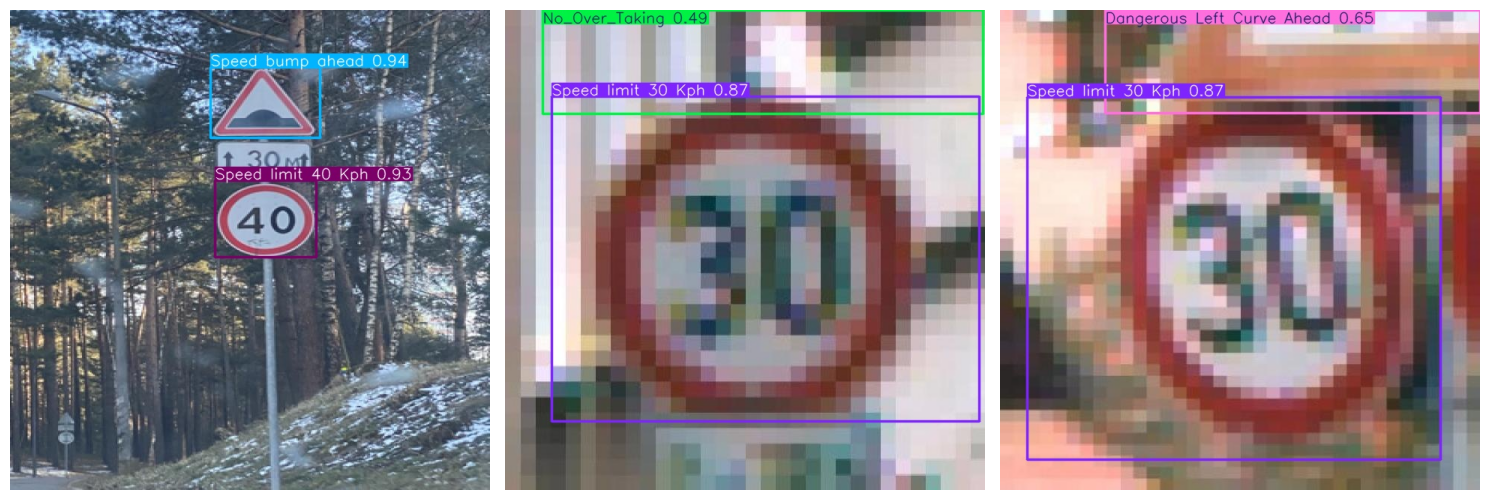

In [16]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Function to display random samples with only the class index
def display_random_samples_with_class_index(images_path, num_samples=3):
    images = os.listdir(images_path)
    random_samples = random.sample(images, num_samples)

    plt.figure(figsize=(15, 10))
    for i, img_file in enumerate(random_samples, 1):
        img_path = os.path.join(images_path, img_file)
        img = mpimg.imread(img_path)
        plt.subplot(1, num_samples, i)
        plt.imshow(img)
        plt.axis('off')  # Hide the axes for cleaner display
    plt.tight_layout()
    plt.show()

# Display random samples from predictions on test dataset:
print("Random samples from inferred images:")
display_random_samples_with_class_index('/content/runs/detect/predict')

In [14]:
from IPython.display import display, Image

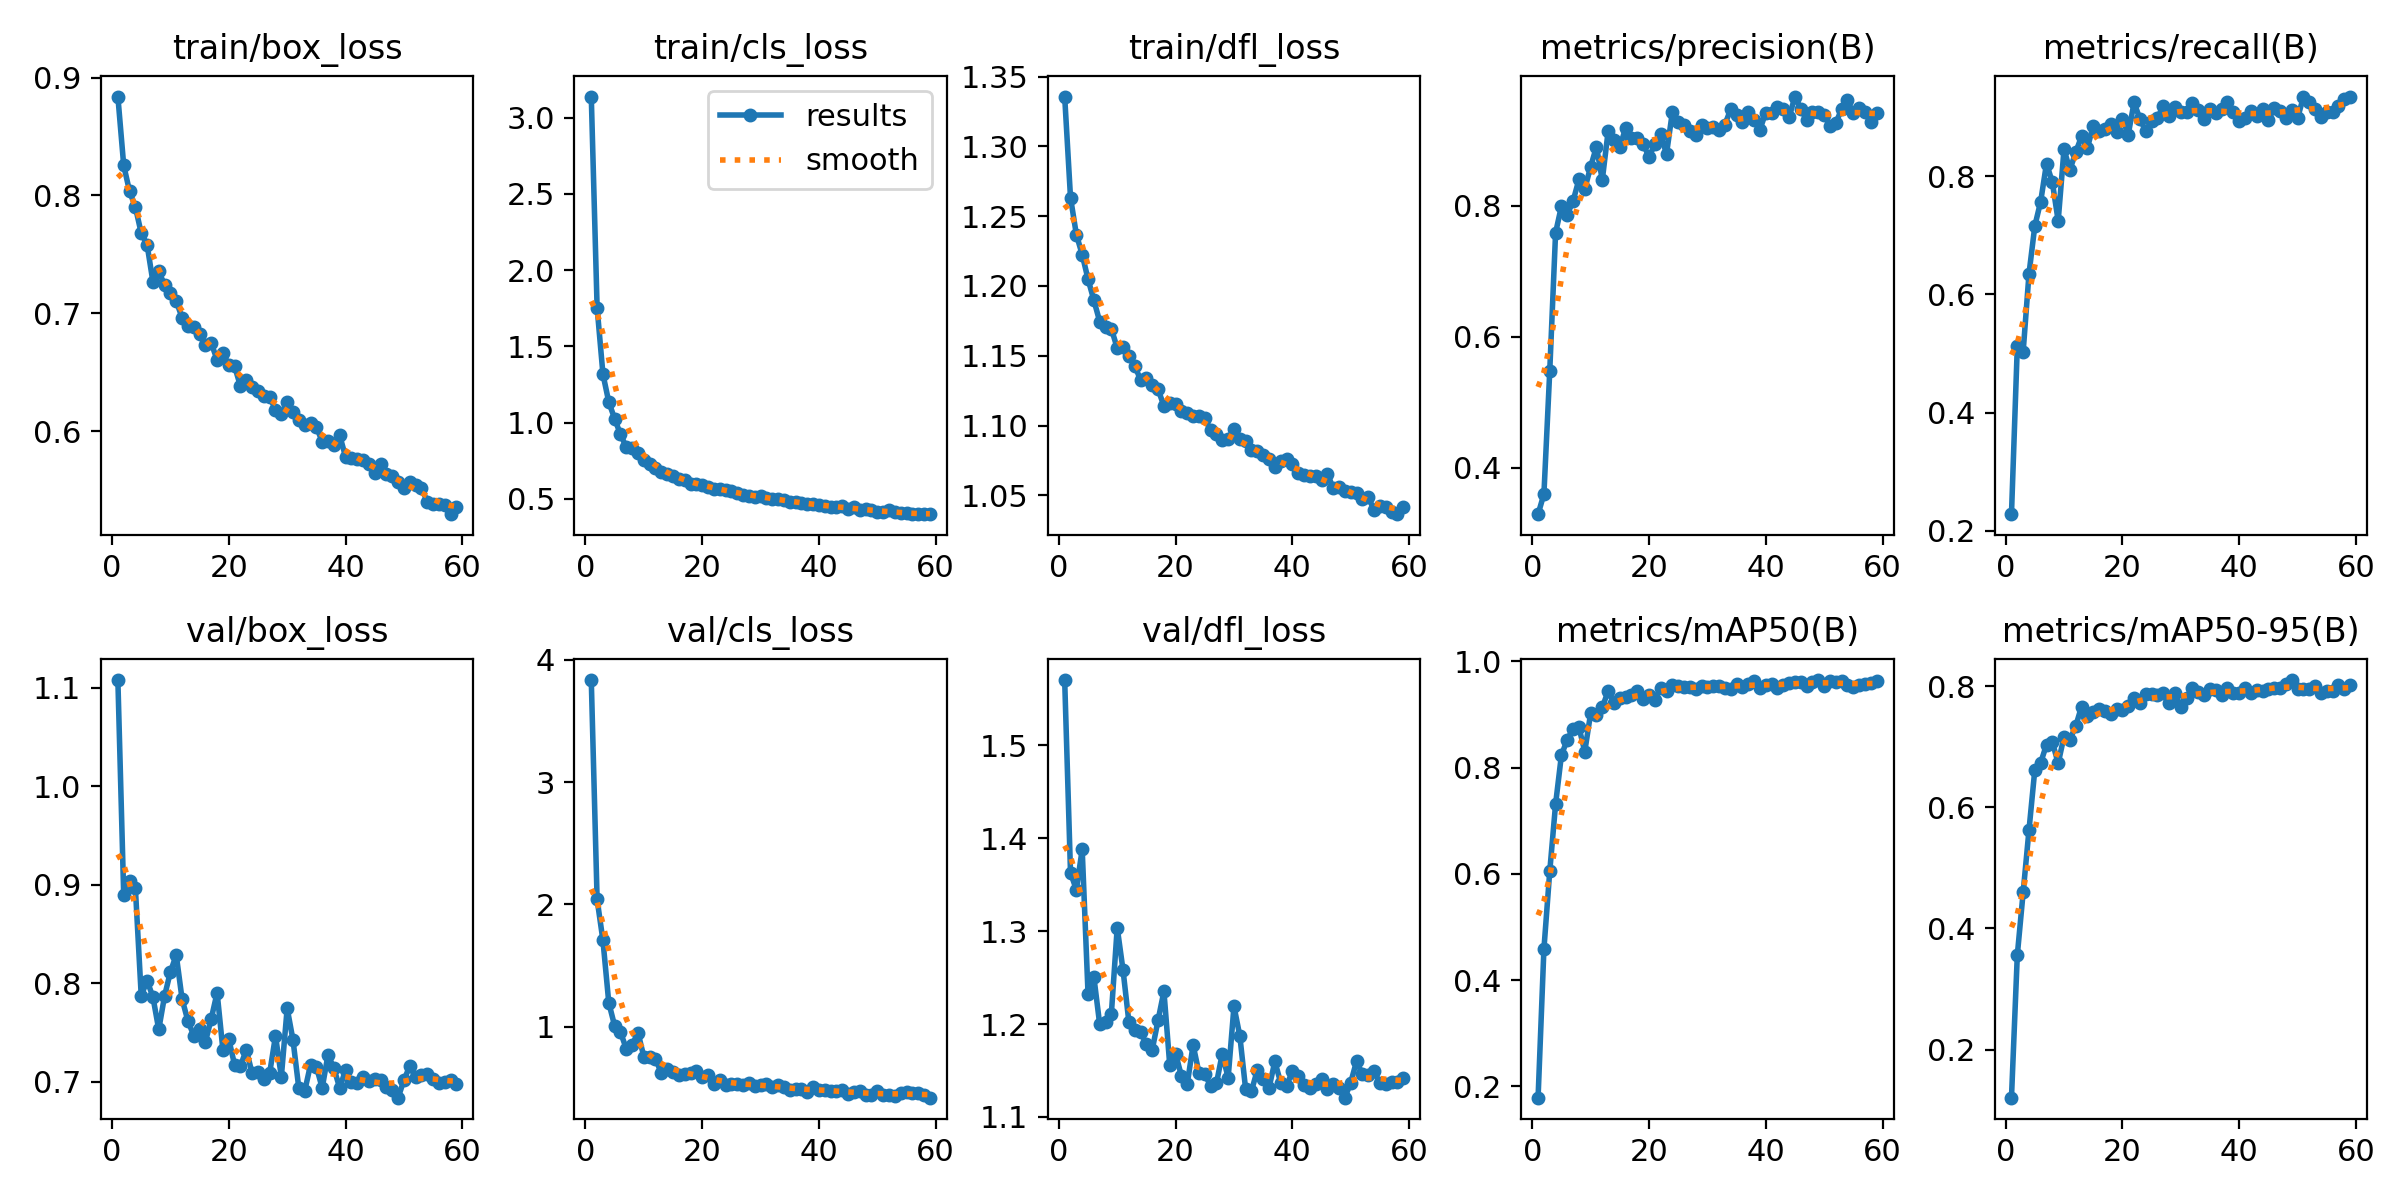

In [15]:
Image(filename='/content/runs/detect/train/results.png', width=1000)

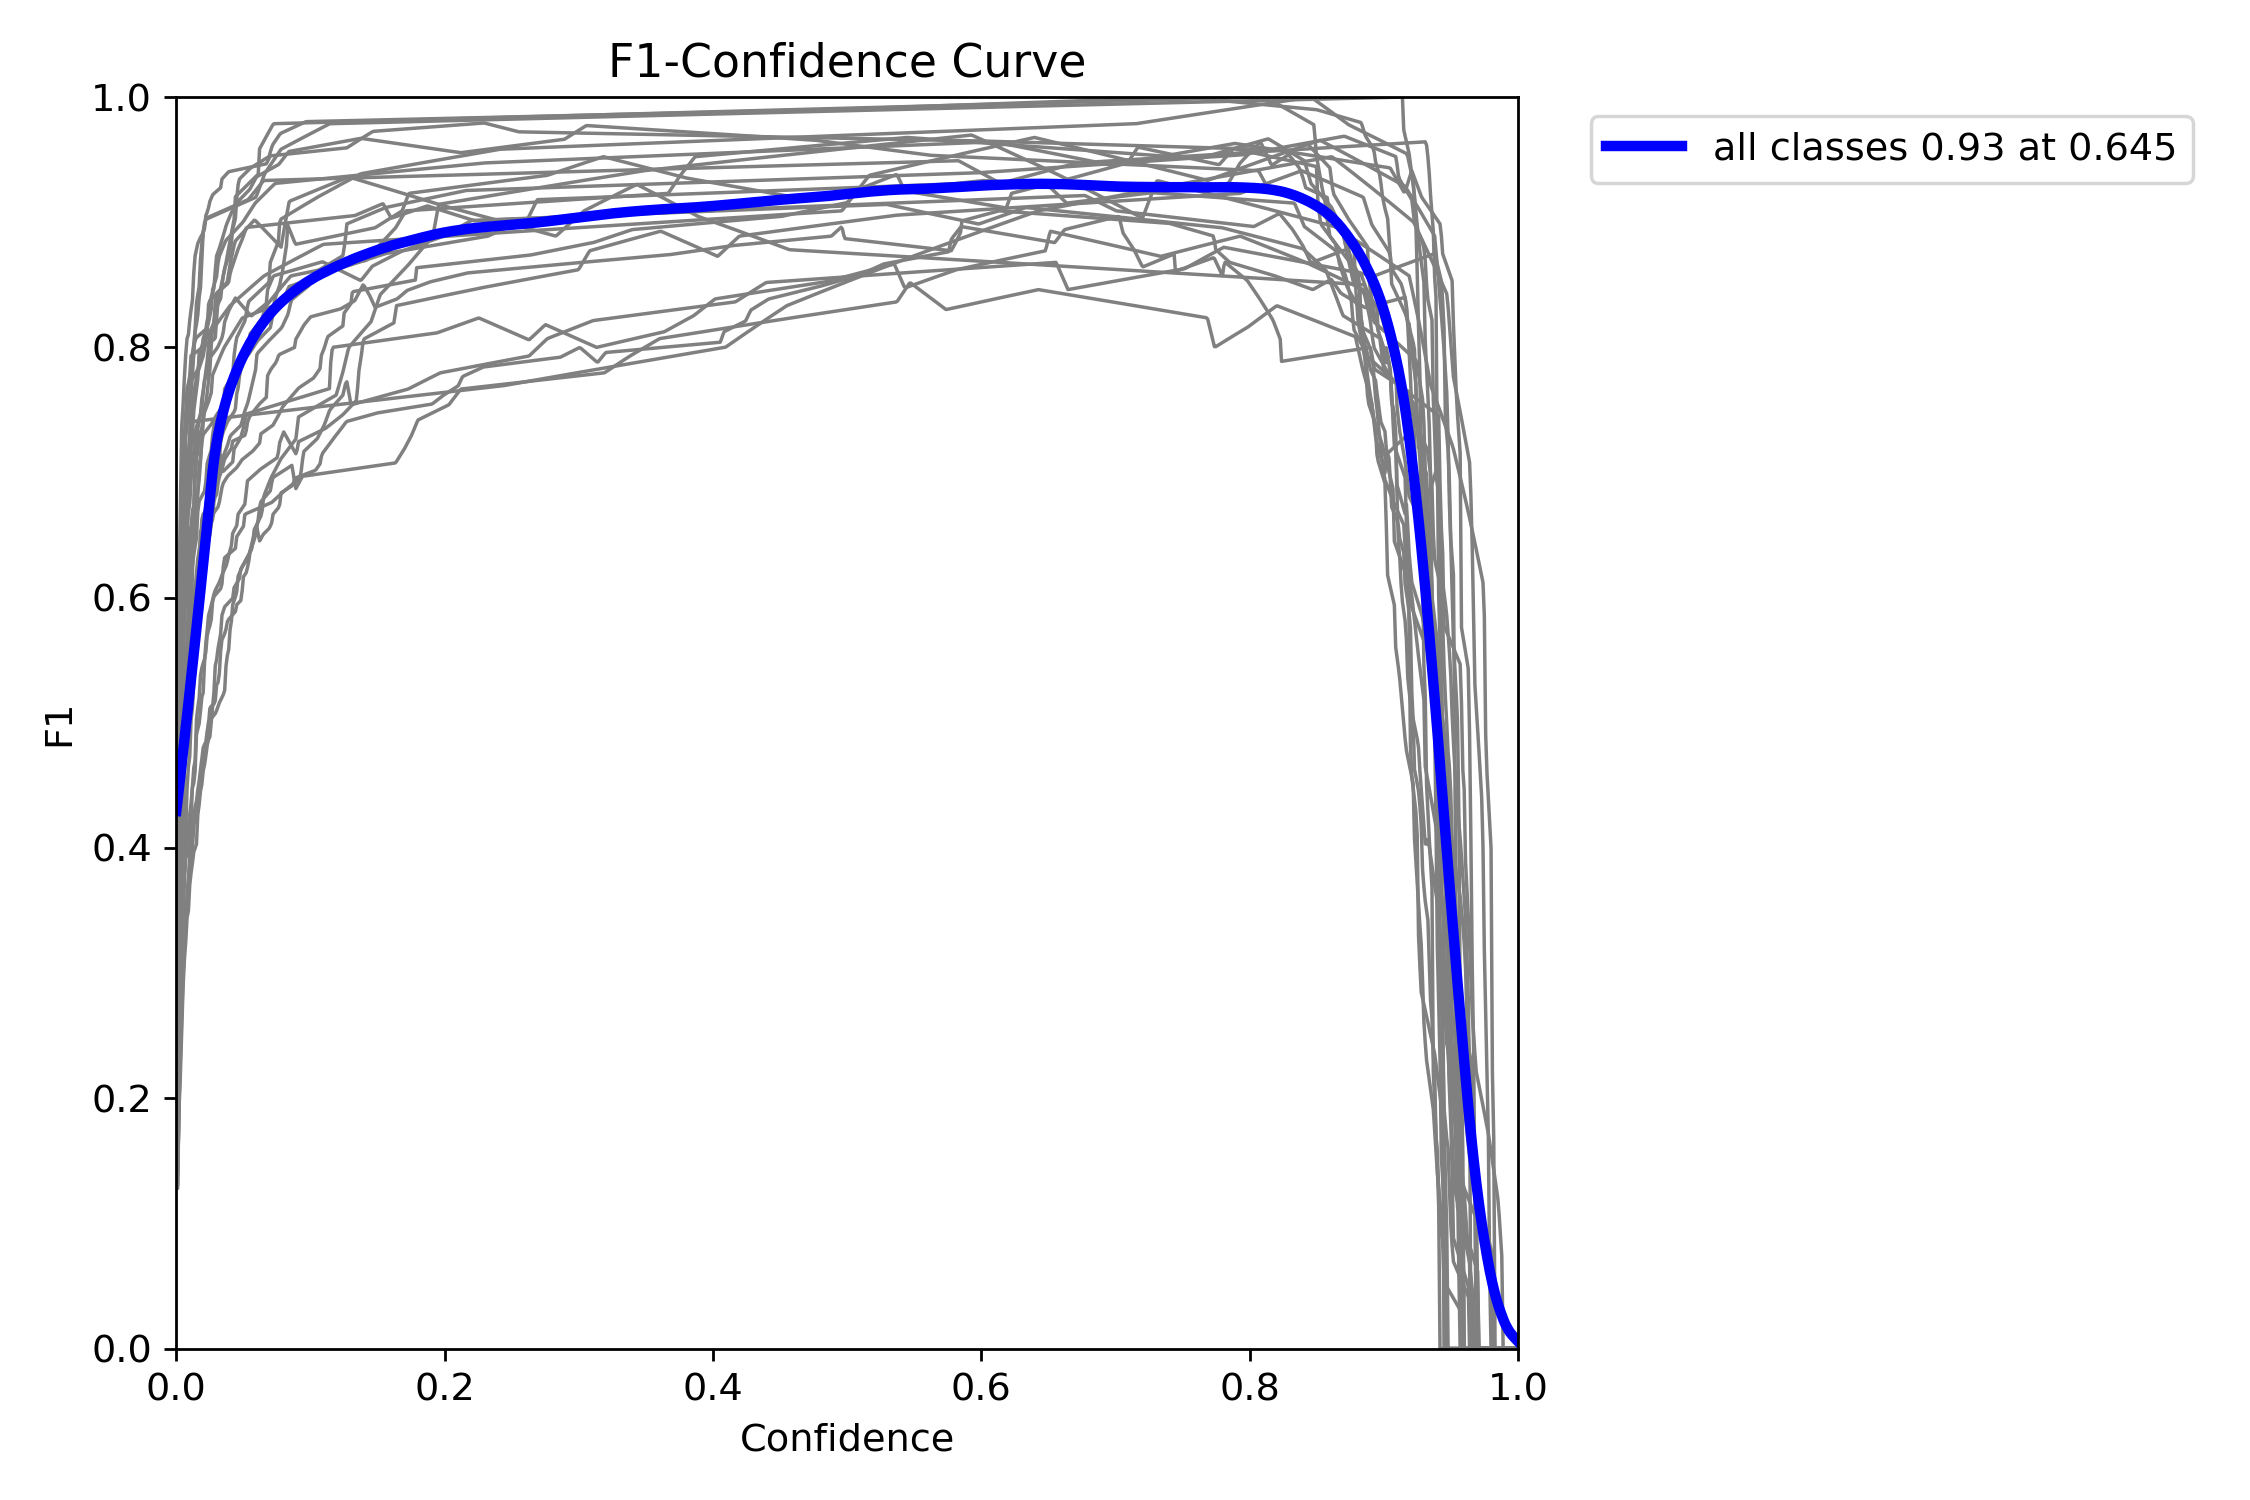

In [18]:
Image(filename='/content/runs/detect/train/F1_curve.png', width=1000)

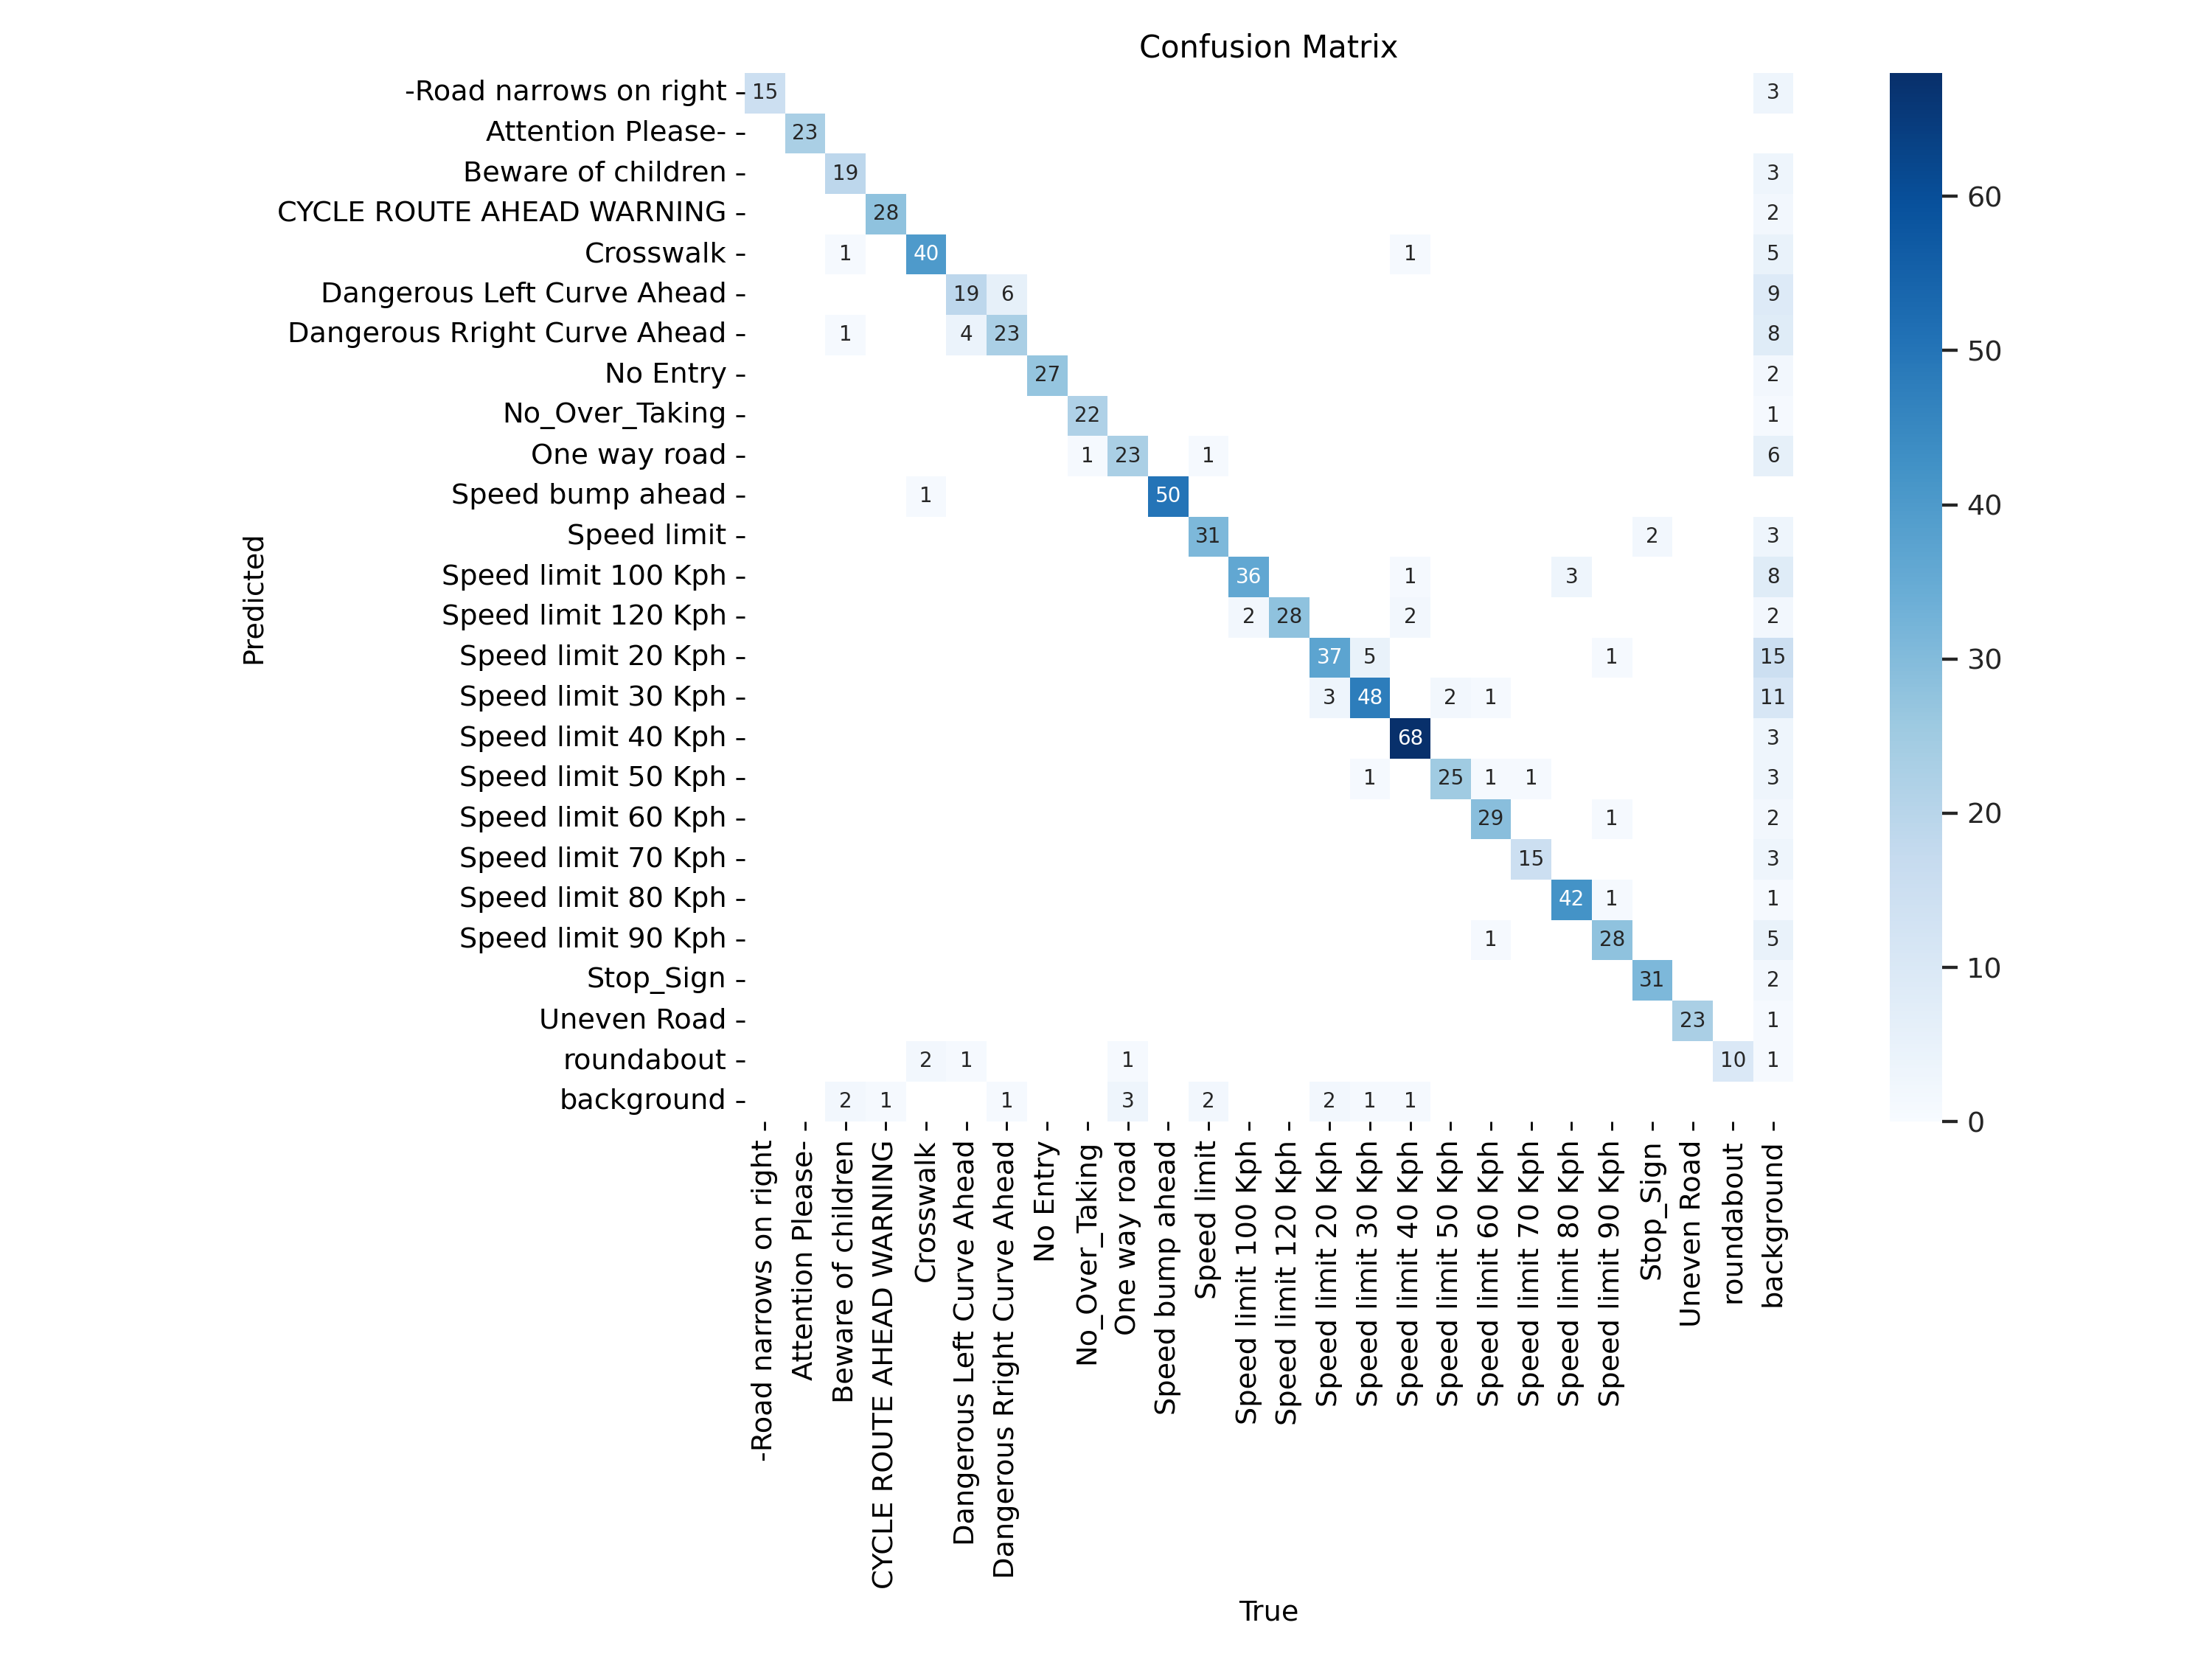

In [17]:
Image(filename='/content/runs/detect/train/confusion_matrix.png', width=1000)

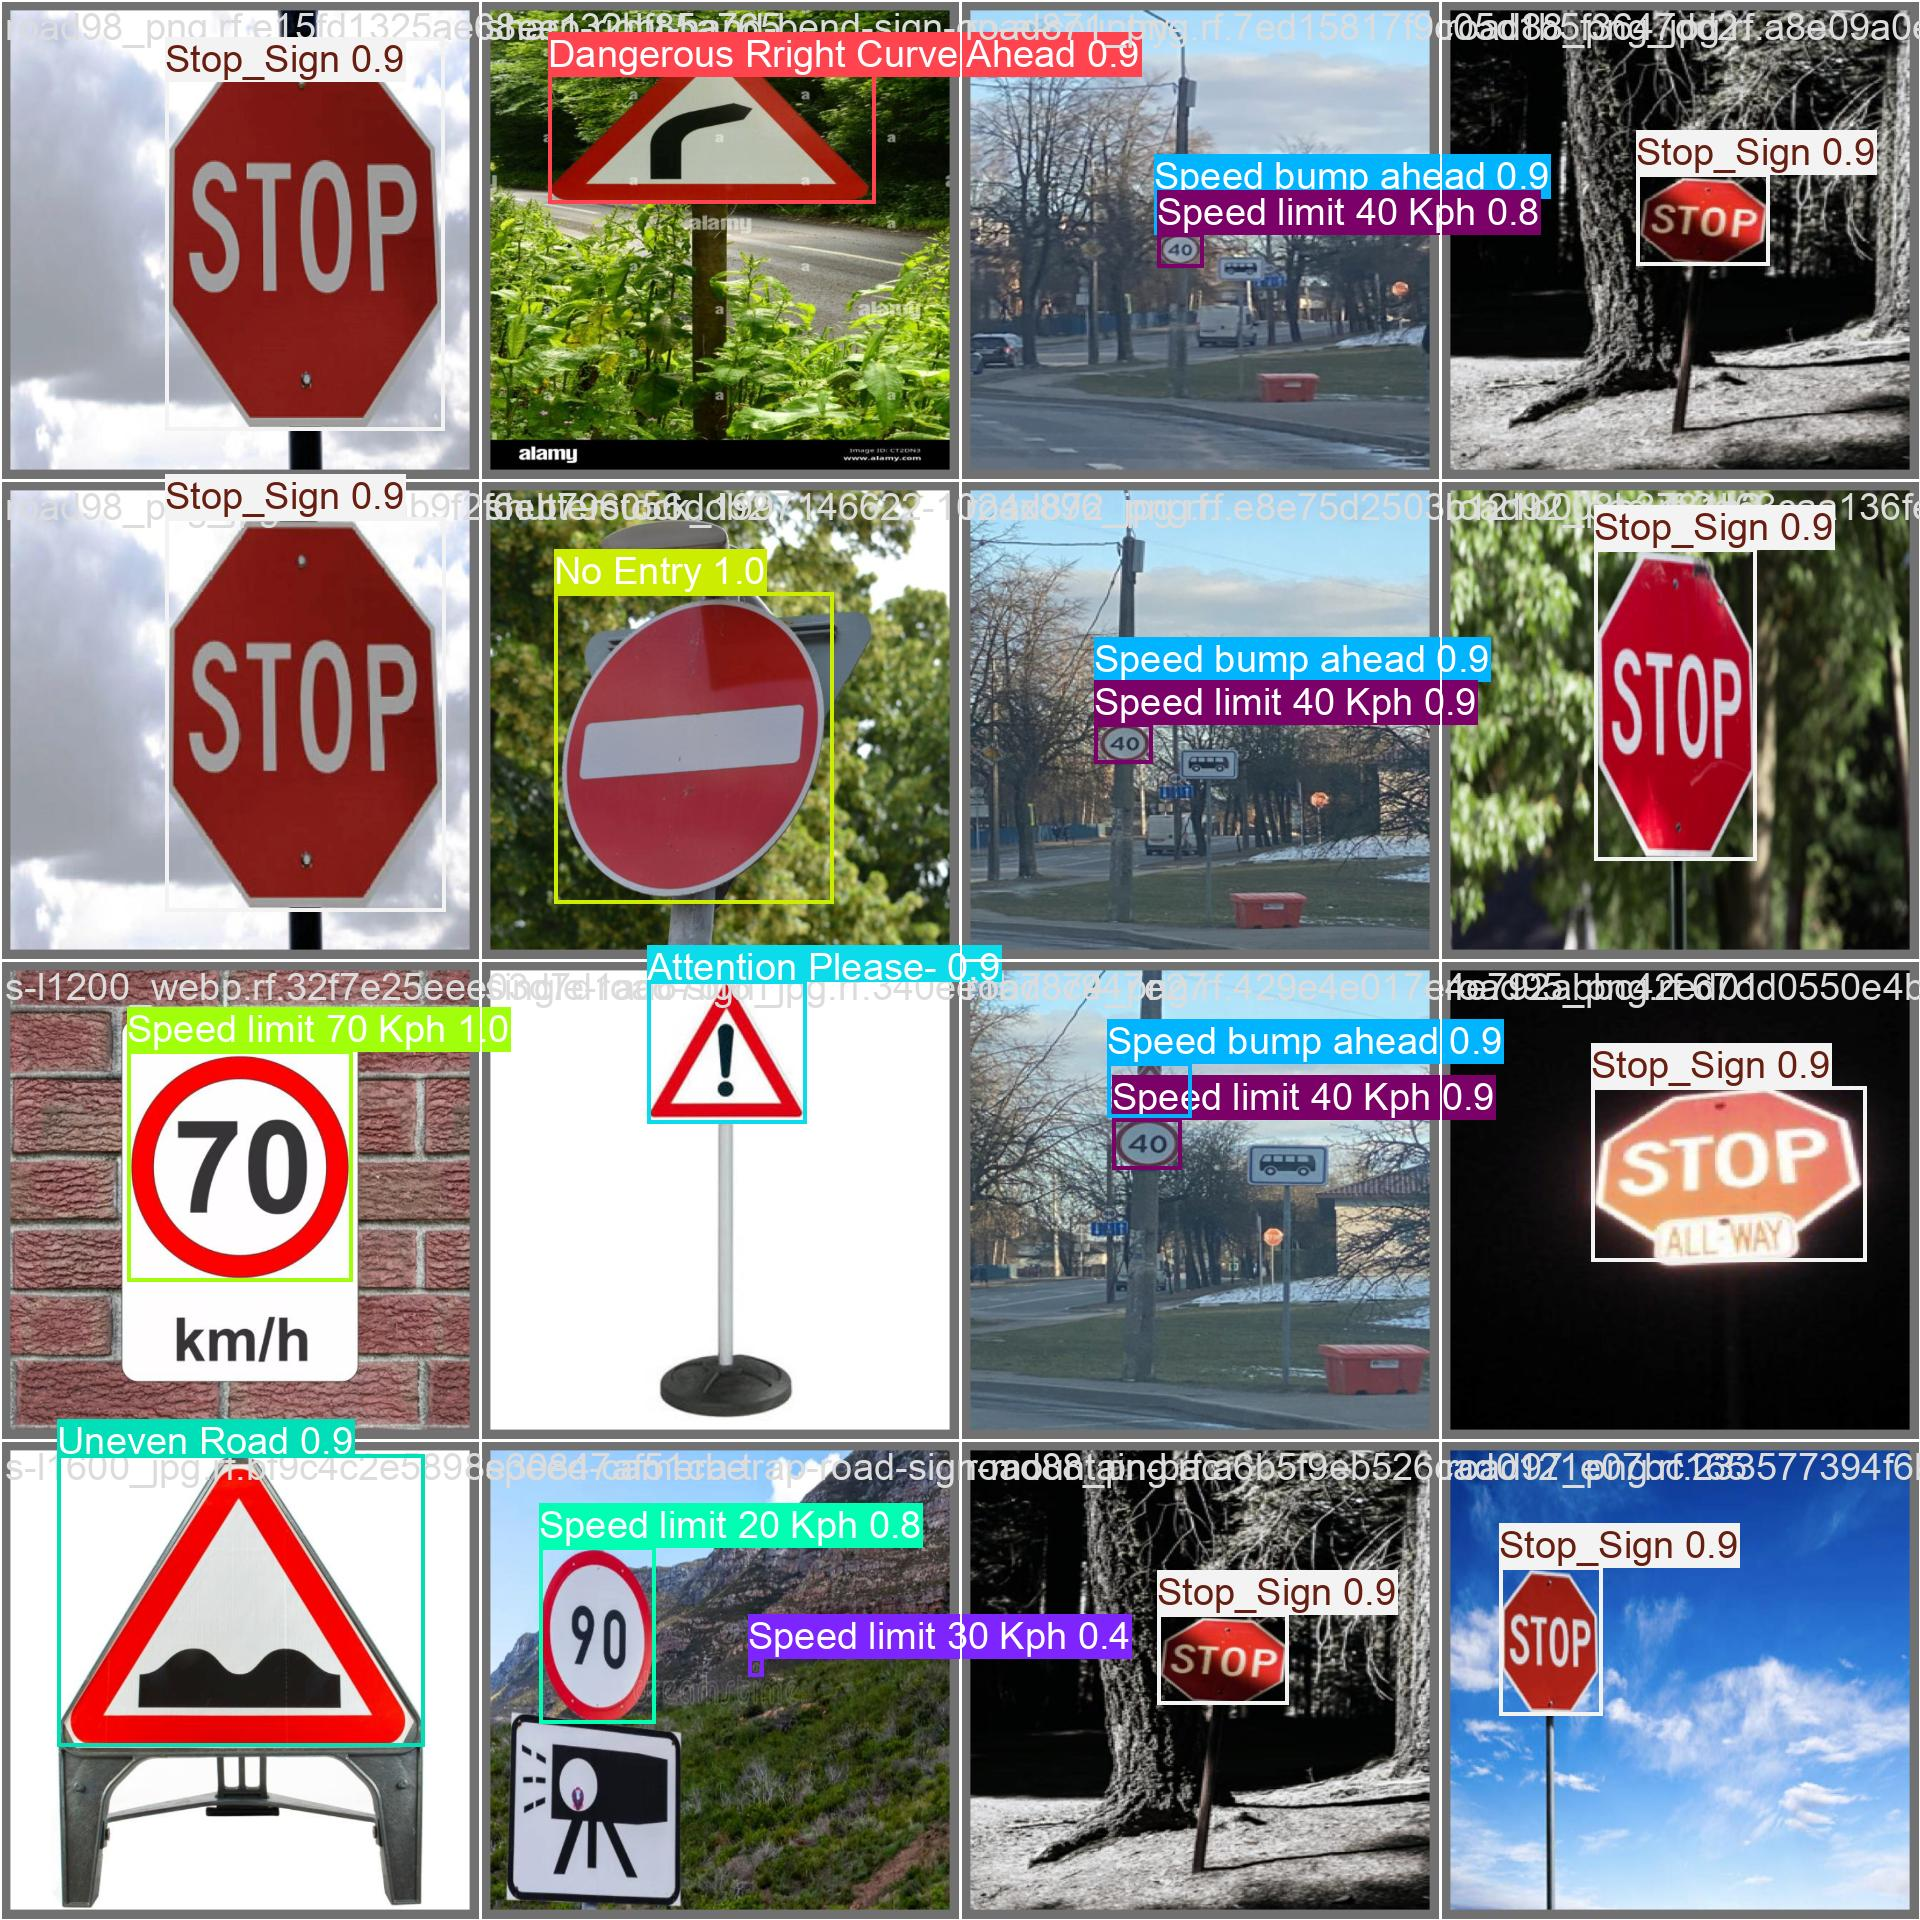

In [19]:
Image(filename='/content/runs/detect/train/val_batch0_pred.jpg', width=1000)